### Packages

In [1]:
# to return the runtime of the code
from time import time
import time
# for math functions like cos, sqrt
import math
import fractions
# for technical computing like integration
from scipy import *
# standard packages for data analysis
import pandas as pd
import numpy as np
# packages for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import plotly.express as px

***
## Introduction

Pi is one of the most important number in geometry and maths. Since, it is an irrational number, it can never be written as a fraction of two whole numbers, and it does not have a terminating or repeating decimal expansion and decimal expansion goes on forever. We can just hope to get a better approximation of the decimal approximations.

Through this project, I wish to demonstrate 8 methods using random sampling and calculus to approximate pi as close to the actual value as possible. 

***
## 1. Base Functions

In this section we'll define functions that will be used in the entirety of our project. Firstly, there are functions related to Random Number Generation to generate a number between 0 and 1. Secondly, there is a function to run the simulations and return the value of π for 3 seed values. Lastly, there are functions to plot errorbars, linear plot, semiLog and loglog plots. Since these are just the definition of functions, this section will take hardly 30seconds to run.

***
### 1.1 Lehmer Number Generator

For the Monte Carlo simulations, we will create a random number generator to generate a random number between (0,1) for each iteration for simulation. We implement Lehmer Random Number Generator which works on 2 fixed parameters:
1. Modulus M, a fixed large prime integer
2. Multiplier A, a integer in Xm = {1, 2, . . . , M − 1}

The period is (M - 1) and the smallest and largest possible values are (1 / M) and 1 - (1 / M) respectively.

The general formula is:
$X_{k+1}$ = A $X_{k}$ mod M.

To calculate $AX mod M$, where X is the seed, we use Schrage's Method. 

Since my system is 64-bit, I am using M = $2^{64}$ - 59. If you have a 32 bit system, use M = $2^{31}$−1

In [30]:
# global variables we'll need in our functions
M = 2**64 - 59  # Modulus for LNG
A = 48271  # Multiplier  for LNG
seed = int(1234567) # the seed X is coprime to M
# to store values of pi generated by each method for 3 seeds
pi_1 = [[],[],[],[]]
pi_2 = [[],[],[],[]]
pi_3 = [[],[],[],[]]
# to store the runtime of all methods
runT = []
# Random Number Generator
def random():
    
    # precompute the auxiliary constants
    # decomposition of M
    Q = int(M / A)  # 382149615166653
    R = int(M % A) # 44594
    
    # to use global variable seed inside this function, we use the global keyword
    global seed
    
    # for Schrage's method, we factor X as follows into 2 single-width multiplication
    # this is to avoid overflow
    # seed/Q can be max: M / Q = A = 48,271
    # seed % Q can be max: Q - 1 = 382149615166652
    # max A * (seed % Q) = 382149615166652 * A = 18446744073709458692 ( which is in the range for a 64-bit computing)
    # max R * (seed / Q) = 44594 * 48,271 = 2152596974
    t = A * (seed % Q) - R * (seed / Q)
    
    # to evaluate new seed
    if (t <= 0):
        seed = (t + M)
    else:
        seed = t
    
    # return a random number between 0 and 1
    return float(seed / M)

# to initialise or reset the state of random number generator
def resetSeed(x):
    global seed
    
    # if x <= 0 then the initial seed is obtained from the system clock
    if(x<=0):
        seed = int(time() % M) 
        
    # if x > 0 then x is the initial seed (unless too large)
    elif(x>0):
        seed = int(x % M)

***
### 1.2 Calculating Pi

This function takes a function name and a list of number of iterations (nums) as an argument. It returns a dataframe with first column as number of iterations, second column as mean of mean of π values simulated for each N for each seed, third column is the standard deviation simulations of each N, fourth column is the seed number for which the particular π value belong to and last column is the absolute difference between the mean value of π and actual value of π.

The first argument of this function is the name of the function which defines the working of the method to be used to simulate π. The second argument is a list of the various N (number of iterations) that we want to perform the simulations for.

This function also calculates the average(mean) of the simulations for each of the N. Sigma1 and Sigma2 errors are also calculated. These values are then sent to the function errbars to plot the errorbars for each N and each seed.

In [3]:
def calcpi(function,nums):
    
    # to use global variables inside this function, we use the global keyword
    global pi_1, pi_2, pi_3
    
    # to store the number of iterations in a local variable
    num = nums
    
    # /* -------------------------------------------------------------------
    #  * We consider 3 seed values for our project. For each seed value, 
    #  * we call the 'function' for all N in the nums and store the simulations 
    #  * of pi returned by 'function' in our global variables pi_1, pi_2, pi_3 
    #  * in the form of a nested list. Each nested list contains the simulations for each N.
    #  * Like pi_1[x] will have the simulations of pi for seed 1 and for num[x] 
    #  * number of iterations, i.e., pi_1[x] will have num[x] elements in the nested list.
    #  * --------------------------------------------------------------------
    #  */
    
    # Seed 1
    # to initialize or reset the seed 
    resetSeed(3.183316696363411e+19)
    
    # for all the elements in num call 'function' and store the simulations in pi_1
    for x in range(len(num)):
        pi_1[x] = function(num[x]) # to store the simulations for seed 1 for each element in num
    
    # Seed 2
    # to initialize or reset the seed 
    resetSeed(3.283316696363411e+19)
    
    # for all the elements in num call 'function' and store the simulations in pi_2
    for x in range(len(num)):
        pi_2[x] = function(num[x]) # to store the simulations for seed 2 for each element in num
        
    # Seed 3
    # to initialize or reset the seed
    resetSeed(3.183316696363411e+18)
    
    # for all the elements in num call 'function' and store the simulations in pi_3
    for x in range(len(num)):
        pi_3[x] = function(num[x]) # to store the simulations for seed 3 for each element in num
        
    
    # Calculate the average 
    # for-in loop calculates the average for each nested list containing the MC simulations of pi for all the seeds
    # using numpys mean function and store it in 3 lists for 3 seeds
    pi_mean_1 = [np.mean(pi_1[x]) for x in range(len(num))] # Seed 1
    pi_mean_2 = [np.mean(pi_2[x]) for x in range(len(num))] # Seed 2
    pi_mean_3 = [np.mean(pi_3[x]) for x in range(len(num))] # Seed 3
    
    # Calculate the standard deviation/ sigma1 error
    # for-in loop calculates the standard deviation/sigma1 error for each nested list 
    # containing the MC simulations of pi for all the seeds
    # using np.std and store it in 3 lists for 3 seeds
    pi_std_1 = [np.std(pi_1[x]) for x in range(len(num))] # Seed 1
    pi_std_2 = [np.std(pi_2[x]) for x in range(len(num))] # Seed 2
    pi_std_3 = [np.std(pi_3[x]) for x in range(len(num))] # Seed 3
    
    # Calculate the 2 * standard deviation/ sigma2 error
    # for-in loop calculates the standard deviation/sigma1 error for each nested list 
    # containing the MC simulations of pi for all the seeds
    # using np.std and multiply each by 2 to get sigma2 error and store it in 3 lists for 3 seeds
    pi_std2_1 = [2*np.std(pi_1[x]) for x in range(len(num))] # Seed 1
    pi_std2_2 = [2*np.std(pi_2[x]) for x in range(len(num))] # Seed 2
    pi_std2_3 = [2*np.std(pi_3[x]) for x in range(len(num))] # Seed 3
    
    # to create a dataframe to be returned
    # declare an empty dataframe using pandas DataFrame function
    pi_df = pd.DataFrame()
    
    # the first column is the elements of num repeated 3 time as we have 3 seeds
    pi_df['N'] = num * 3
    # the second column stores the mean values of pi calculated using for-in loop before for each seed
    # by concatenating the 3 lists 
    pi_df['Mean'] = pi_mean_1 + pi_mean_2 + pi_mean_3
    # the third column stores the standard deviations of pi simulations calculated for 3 seeds
    # by concatenating the 3 lists 
    pi_df['sigma1'] = pi_std_1 + pi_std_2 + pi_std_3
    # the fourth column is the seed number from which a particular value of pi has been generated
    # using np.repeat we store each of the seed number repeated for length of num times
    pi_df['group']=np.repeat(['seed1','seed2','seed3'],len(num))
    # the fifth column is the absolute difference between our calculate mean pi and actual pi
    # math.pi gives is the actual value of pi which is subtracted from the mean pi stored in column 'Mean' of df
    # abs returnn the absolute value of the difference 
    # makes any negative number positive, while positive numbers are unaffected
    pi_df['diff']= abs(math.pi-pi_df['Mean'])
    
    # plot error bars for sigma1 and sigma2 errors using errbars function
    # it takes as argument the 3 lists for mean pi values, the sigma errors for 3 seeds 
    # and a list with number of iterations (num)
    errbars(pi_mean_1,pi_mean_2,pi_mean_3,pi_std_1,pi_std_2,pi_std_3,num)
    errbars(pi_mean_1,pi_mean_2,pi_mean_3,pi_std2_1,pi_std2_2,pi_std2_3,num)
    
    # return the dataframe created
    return pi_df

***
### 1.3 Plotting Errorbars

When we simulate the data, it has a lot irregularites due to approximations. Errorbars are used to display the uncertainities and errors in the values and how dispersed are they from the actual result. This function displays these uncertainities in the values of π we simulated using the mean and standard deviation.

This function takes mean values and standard deviations of π values simulated for the 3 seeds and the list of number of iterations (nums) as arguments.
Each argument is a list. First one is the mean of π values simulated using seed 1 for all N. Similarly, next 2 arguments are mean values of π simulated using seed 2 and 3. The fourth, fifth and sixth arguments is the standard deviation of simulations from seed 1, seed 2 and seed 3 directly. The last argument is the list of number of iterations.

It displays errorbars which tells us the range of values of π simulated within $(mean - standardDeviation)$ and $(mean + standardDeviation)$. 

The displayed plot will have 3 error bars for each N and each seed. So if there are 3 N in the nums list, a total of 9 errorbars will be displayed.

We plot errorabrs to see the simulated value of π converging to the actual value as number of iterations increase amd the error bars become smaller as N increases.

In [4]:
def errbars(pi_mean_1,pi_mean_2,pi_mean_3,pi_std_1,pi_std_2,pi_std_3,nums):
    
    # x is the list of numbers between 1 and length of list of number of iterations (nums) we will consider
    # np.arange returns the list of evenly spaced values from start to end
    # this x is to determine the position of each error bar on the x-axis
    # our list starts from 1 as we don't want any errorbar on x=0.
    # since the the stop (second argument in ap.arange) is excluded so we use len(nums) + 1 as stop
    # to get the exact number of positions as there are elements in nums
    x = np.arange(1, len(nums)+1)
    
    # create a figure object with figsize to set the (width,height) of the figure/plot
    f = plt.figure(figsize=(13, 5))
    # to add a plot on 111 position (1x1 grid and first position)
    ax1 = f.add_subplot(1, 1, 1)
    
    # since we need 3 errorbars for each N in nums, offset determines the position of 3 errorbars 
    # as x - offset, x , x + offset to plot them clearly
    offset_cat = 0.25
    
    # this displays a red horizontal line through the actual value pi
    # linestyle determines that it will be a dashed line
    ax1.axhline(y=math.pi, color='r', linestyle='--')   
    
    # matplotlib errorbar() function is used to display errorbars
    # first argument is the horizontal coordinate of the errorbar 
    # which here will be the x-offset, x, x+offset depending on the seed number
    # second argument is the y-coordinate which are pi values simulated
    # yerr is the vertical error bar sizes which will be equivalent to our standard deviation
    # fmt is used to plot bars with markers. Here it markers will be at the mean value od pi
    # elinewidth is to set the width of the bar
    # Here first argument is x-offset as it displays the value by seed 1 (the first errorbar)
    ax1.errorbar(x-offset_cat, pi_mean_1, yerr=pi_std_1,fmt='o', elinewidth=3)
    # Here first argument is x as it displays the value by seed 2 on the right of seed 1 (the second errorbar)
    ax1.errorbar(x, pi_mean_2, yerr=pi_std_2,fmt='o', elinewidth=3)
    # Here first argument is x+offset as it displays the value by seed 3 on the right of seed 2 (the third errorbar)
    ax1.errorbar(x+offset_cat, pi_mean_3, yerr=pi_std_3,fmt='o', elinewidth=3)
    
    # Customization of the plot
    # grid() adds a grid on our plot
    ax1.grid()
    # to set the label of x axis
    ax1.set_xlabel("Number of Iterations (N)")
    # to set the label of y axis
    ax1.set_ylabel("Simulated Pi")
    # to set the title of the plot
    ax1.set_title("Pi values against N")
    # to display the legend
    # it can take an explicit list of labels we want in our legend as a list
    ax1.legend(["Pi",'seed 1', 'seed 2', 'seed 3'])
    # to configure tick locator and formatter
    # Nullformatter() is used to set no labels on ticks for the axis
    # we use this to set no labels for the xaxis
    ax1.xaxis.set_minor_formatter(ticker.NullFormatter())
    # NullLocator() sets no ticks on the xaxis
    locator = ticker.NullLocator()
    # we set no ticks on the xaxis
    ax1.xaxis.set_major_locator(locator)
    # customize the xaxis tick labels
    # set the size, color and how thick the label will be and store it in style
    style = dict(size=12, color='black', fontweight='extra bold')
    # for each N, with text() fucntion
    # place the iteration N value on (x,y) the first 2 arguments with customized style
    for i in range(0,len(nums)):
        ax1.text(i+1, 3, nums[i], ha='center', **style)

***
### 1.4 Linear Plot

Linear plot is used to see the coorelation between X and Y values. That is you may want to know when one variable increases, the other one increases or decreases.

Here we plot a line chart with Number of iterations on the x-axis and difference between actual π and mean of simulated values of π on the y-axis for each of the three seeds.

The following function takes the dataframe returned by calcPi function as an argument and plots a line chart. 
From the line chart, we want to see the decrease of difference between actual and simulated value of π as number of iterations increase.

In [5]:
def linearPlot(estPi):
    
    # create a figure object with figsize to set the (width,height) of the figure/plot
    f = plt.figure(figsize=(13, 5))
    
    # to add a plot on 111 position (1x1 grid and first position)
    ax = f.add_subplot(1, 1, 1)
    
    # seaborn pointplot shows comparison for different seeds and N
    # x is the number of iterations
    # y is the difference between actual pi and simulated pi 
    # hue is to determine the column to be used for color encoding. Here we use the column with the seed numbers
    # linestyles denote the type of line to draw to connect the points
    # markers are used to place markers at the coodinates to signify the value of difference (N,difference) 
    # the last argument is the data frame to use
    ax = sns.pointplot(x="N", y="diff",hue="group",data=estPi)
    # to set the label of x axis
    ax.set_xlabel("Number of Iterations (N)")
    # to set the label of y axis
    ax.set_ylabel("Difference between Actual and simulated Pi")
    # to set the title of the plot
    ax.set_title("Difference vs N")
    # to display the legend
    # it can take an explicit list of labels we want in our legend as a list
    # and a list of colors for each legend
    # to just display the legend labels, we make handlelength = 0
    ax.legend(['seed 1', 'seed 2', 'seed 3'],labelcolor=["blue","orange", "green"],handlelength=0)

***
### 1.5 SemiLog Plot

A semi-log graph uses a linear scale on the x-axis and a logarithmic scale on the y-axis. We can use this type of plot when there is variability in the values of y. This type of graph is particularly useful for visualizing percentage change of some variable over time.

Here we plot a point plot with Number of iterations on the x-axis and difference between actual π and mean of simulated values of π on the y-axis for each of the three seeds on a log scale.

We use the semilog plot to visualize the percentage change/decrease of π values with increase in number of iterations. So to zoom in and get a clearer picture of the relation between N and the difference we plot the differences on a log-scale.

The following function takes the dataframe returned by calcPi function as an argument and plots a semilog plot. 
From the plot, we want to see the decrease of difference between actual and simulated value of π as number of iterations increase (a straight line with a negative slope).

In [6]:
def semiLogPlot(estPi):
    
    # create a figure object with figsize to set the (width,height) of the figure/plot
    f = plt.figure(figsize=(13, 5))
    # to add a plot on 111 position (1x1 grid and first position)
    ax = f.add_subplot(1, 1, 1)
    
    # seaborn pointplot shows comparison for different seeds and N
    # x is the number of iterations
    # y is the difference between actual pi and simulated pi 
    # hue is to determine the column to be used for color encoding. Here we use the column with the seed numbers
    # linestyles denote the type of line to draw to connect the points
    # markers are used to place markers at the coodinates to signify the value of difference (N,difference) 
    # the last argument is the data frame to use
    ax = sns.pointplot(x="N", y="diff",
              linestyles = '-.',
              markers = '^',
              hue = "group",
              data = estPi)
    
    # to set yscale on a logarithmic axis we use set function set 
    # and yscale option set to log
    ax.set(yscale="log")
    # to set the label of x axis
    ax.set_xlabel("Number of Iterations (N)")
    # to set the label of y axis
    ax.set_ylabel("Difference between Actual and simulated Pi (Logarithmic scale)")
    # to set the title
    ax.set_title("Difference vs N")
    # to display the legend
    # it can take an explicit list of labels we want in our legend as a list
    # and a list of colors for each legend
    # to just display the legend labels, we make handlelength = 0    
    ax.legend(['seed 1', 'seed 2', 'seed 3'],labelcolor=["blue","orange", "green"],handlelength=0)

***
### 1.6 LogLog Plot

LogLog Plot is to show the percent change of variable or to respond to the variability of a variable. Although the linear scale shows the absolute value of the variable over increased value of x-axis while the logarithmic scale shows the rate of change of variable over time, sometimes LogLog plot gives a clearer conclusion about that the rate of change of the variable.

Here we plot number of iterations on x-axis and difference between actual π and mean of simulated values of π on the y-axis for each of the three seeds both on logarithmic scales. 
We use the loglog plot to visualize the percentage change/decrease of π values with increase in number of iterations.

The following function takes the dataframe returned by calcPi function and list of number of iterations as its arguments and plots a loglog plot. 
From the plot, we want to see the decrease of difference between actual and simulated value of π as number of iterations increase (a straight line with a negative slope).

**Note: If the log-log plot isn't displayed when you load the Jupyter Notebook, click on Trusted at the top-right corner of the notebook.**

In [7]:
def logLogPlot(estPi,nums):
    
    # create a plotly figure object
    fig = go.Figure()
    
    # add_trace is to add a trace to our graph object figure
    # use go.scatter trace to add to our plot 
    # mode is to specify the drawing mode at the coordinates 
    # we use lines and markers to plot the points on the coordinates (N,difference) (to visualize the value of difference) 
    # and connect them with lines
    # x is the number of iterations
    # y is the the difference with the values of pi which is stored in the 4th column of our dataframe
    # name is to set the trace name to appear in the legend
    # marker_color, marker_symbol and marker_size are to customize markers for each trace differently
    # trace for seed 1
    fig.add_trace(go.Scatter(mode="lines+markers", x=nums, y=estPi.iloc[0:len(nums),4] ,name = "seed 1",
                         marker_color='#c92a52', marker_symbol='triangle-down',marker_size=7))
    # trace for seed 2
    fig.add_trace(go.Scatter(mode="lines+markers", x=nums, y=estPi.iloc[len(nums):2 *len(nums),4], name = "seed 2",
                         marker_color='black', marker_symbol='x-thin',marker_line_width=3))
    # trace for seed 3
    fig.add_trace(go.Scatter(mode="lines+markers", x=nums, y=estPi.iloc[2 *len(nums):,4], name = "seed 3",
                         marker_color='#4d70c9', marker_symbol='triangle-up', marker_size=7))
    
    # update xaxis to a log scale
    fig.update_xaxes(type="log")
    # update yaxis to a log scale
    fig.update_yaxes(type="log")
    # update_layout() is used to update various properties of the figure's layout
    # below we set the title of the plot
    fig.update_layout(title="Difference vs N (Both axes on log scale)")
    # update_xaxes() is to update properties of the figure's x-axis
    # first property title_text is to change the axis label/title
    # title_font is used to customize the font of the axis title, we change the size of the label
    # title_standoff is to specify the distance between tick values and axis title
    # tickvals is to set the values at which ticks appears
    # ticktext sets the text to be displayed at the ticks position
    fig.update_xaxes(
        title_text = "Number of Iterations (N)",
        title_font = {"size": 20},
        title_standoff = 25,
        tickvals=nums, ticktext=nums)
    
    # update_yaxes() is to update properties of the figure's y-axis
    # first property title_text is to change the axis label/title
    # title_standoff is to specify the distance between tick values and axis title
    # tickvals is to set the values at which ticks appears
    # ticktext sets the text to be displayed at the ticks position
    fig.update_yaxes(
        title_text = "Difference Between Actual Pi and obtained Pi",
        title_standoff = 25,
        tickvals=[0.001,0.01,0.1], ticktext=[0.001,0.01,0.1])
    
    # to display the plot
    fig.show()

***
## 2. Functions for methods

The functions in this section correspond to the 8 methods we'll work with to approximate pi as close to it's actual value as possible. 

All the methods perform Monte Carlo Simulations except the first one. I have given a brief description about each of the methods here. More details and calculations will be in the report. For all the methods except the first one (Archimedes), I will perform the simulations in the Results Section. So, this section will just have the definition to show the working of Monte Carlo Methods used which will take about 30seconds to run as we are not running simulations here. 

***
### 2.1 Archimedes’ method

This methods states that we can estimate pi by estimating the perimeter of a regular polygon with a huge number of sides. A polygon with a lot of sides, 100 or 100000 sides will look like a circle. So we use polygon's perimeter to calculate circle's circumference. 

$2 * π * r = N * L$,

$π = (N * L) / (2 * r)$

where N is the number of sides of the polygon, L is the side length and r is the radius of the circle.

We'll assume we know the length of the polygon L = 1. If we apply some geometry, we get $r = (L/2)/sin(alpha/2)$,
where $alpha = 360/N$ (calculations in report).

The following function takes the argument the number of sides of the polygon and return pi after performing calculations. This method takes about **0.00029 seconds** for all 4 N **(100,1000,10000,100000)** to evaluate so this method is fast to work with. This maybe because it doesn't use simulations to run.

In [9]:
def Archimedes(N):
    # Length of side of the polygon
    Length = 1
    # calculate radius of the circle
    rad = Length / (2 * math.sin(math.radians(360/(N*2))))
    # calculate the value of pi
    pi = (Length * N) / (2 * rad)
    # return the calculated pi
    return pi

In [31]:
# number of iterations
num = [100,1000,10000,100000]
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# for each N in num calculate the value of pi and store it in a list
pi = [Archimedes(N) for N in num]
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runT.append(time.process_time() - start)
# we create a dataframe using pandas DataFrame function
# which has first column as N (sides of the polygon)
# second column is the approximated value of pi
# third column is the absolute difference between each approximated pi and actual pi
pi_df = pd.DataFrame(
    {'N':num,
     'Value_Pi':pi,
     'Diff': [abs(math.pi - x) for x in pi]
    })

0.0002959999999996299


In [13]:
# display the approximated pi and difference from the actual value
pi_df

N  Value_Pi          Diff
0     100  3.141076  5.167458e-04
1    1000  3.141587  5.167710e-06
2   10000  3.141593  5.167713e-08
3  100000  3.141593  5.167715e-10

As we can see that as we increase the number of iterations, the difference decreases indicating that we get closer to the actual pi with the increase in N.

Below we plot a Linear Graph to see this visually.

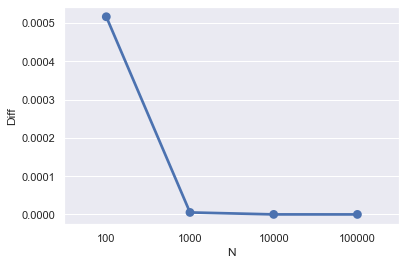

In [14]:
# set the theme of the plot
sns.set_theme(style="darkgrid")
# use seaborn's pointplot to plot the difference on the y-axis and number of iterations on X
# the last argument is the data frame to use
ax = sns.pointplot(x="N", y="Diff",data=pi_df)

We see that there is a sharp decrease from when N=100 to N=1000 but it seems that after N=1000, the difference is almost constant. To apprehend it more clearly, we draw the following LogLog Plot and SemiLog Plot.

We use Matplotlib's loglog function to get a loglog plot with x as number of iterations, y as the difference in values of actual and approximated π, linewidth signifying the width of the line to connect the markers and markers to specify the type of markers to place at the coordinates (N,difference)

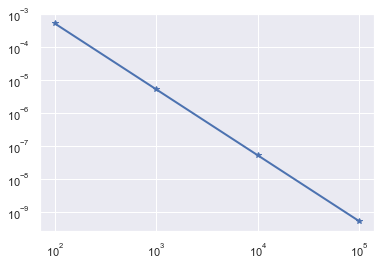

In [15]:
plt.loglog(pi_df["N"], pi_df["Diff"],linewidth=2, marker =('*'))

From the above plot, we can clearly see that the difference decreases as N increases and rate of decrease is almost constant. We can verify this using the following SemiLog plot.

We use Seaborn's pointplot to plot the semilog plot with y-axis on a logarithmic scale.

[None]

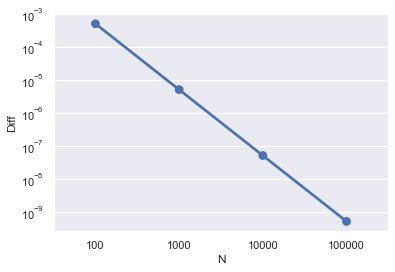

In [16]:
# use seaborn's pointplot to plot the difference on the y-axis and number of iterations on X
# the last argument is the data frame to use
ax = sns.pointplot(x="N", y="Diff",data=pi_df)
# to make the y-axis on a logarithmic scale
ax.set(yscale="log")

The above plot also gives the same result as LogLog plot, i.e., the Difference decreases as N increases and percent decrease is almost constant.

***
### 2.2 Buffon’s needle

This experiment involves dropping a needle on a lined sheet of paper with same width between the lines and estimating the probability of the needle crossing one of the lines on the page. This method states that this probability is directly related to the value of pi. The probability that the needle will touch either of the lines is given by the solution as follows:

$P = (2 * l) / (π * t)$,

where l is the length of the needle, t is the distance between the parallel lines and P is the probability of intersection, i.e., number of needles crossing the line by the total number of tosses of the needle.

So, $π = (2 * l) / (P * t)$

In my experiment I consider that length of the needle is 3/8 of the distance between the parallel lines.  In this case, the probability that the needles will cross the lines is $3/4π$. So, 

$π = (3/4) * (n/x)$  

Since, our approximation of pi is 3927/1250, 

$x ≈ (312 * n) / 1309$. 

So our N (number of iterations) should be a multiple of 1309. 

In the below function, we simulate (u,theta) which will describe the position of the needle. u is the x-coordinate of the left-hand endpoint and theta will be the angle at which the needle falls. So the x-coordinate of the right-hand endpoint $v = u + l * cos(theta)$. The needle crosses at least one line if and only if v > 1. u and θ are independent and u ∈ [0,1] and Uniform(−π/2, π/2). Here we consider that the distance between lines is 1.

In [17]:
HALF_PI =(3927/2500)          # 1.5707963...           */
R   =    3/8                   # length of the needle   */

# to generate theta 
def Uniform(a,b):  
# --------------------------------------------
# * generate a Uniform random variate, use a < b 
# * --------------------------------------------
# */
  return (a + (b - a) * random()) 

In [18]:
def Buffon(N):
    # to use global variables inside this function, we use the global keyword
    global HALF_PI, R
    # to store the number of needles crossing the line
    crosses = 0 
    p = 1
    pi = []
    # -------------------------------------------------------------------------------
    # * this function takes N as argument which is the number of iterations and returns 
    # * N number of simulations of pi. for each iteration, it generates u and theta randomly 
    # * using random() and Uniform() and calculates v. If V > 1, then the needle intersects the line
    # * and count of crosses variable increase. For each iteration, we calculate p probability of intersection 
    # * for ith iteration as number of crosses uptil that iteration divided by i+1 (which number of iteration it is; 
    # * since i starts from 0 so we add 1 else the first probability calculation will have division by zero) 
    # * and store the calculation in list of simulated pi.
    # -------------------------------------------------------------------------------
    # */
    
    # for N iterations
    # we use int(N) as N is passed as a string in array nums
    for i in range(0,int(N)):                
        u     = random() #get first endpoint (x-coordinate)                                  
        theta = Uniform(-HALF_PI, HALF_PI) #get Angle
        v     = u + R * np.cos(theta) #get second endpoint (x-coordinate)
        # check if the second endpoint v > 1, if it is then increase the number of crosses
        if (v > 1.0):
            crosses += 1 #increase number of crosses
            # calculate the probability of intersection for ith iteration
            p = float(crosses / (i+1))
            # obtain pi by 3/4*p and append it to the simulated pi list
            pi.append(3/(4*p))
        # else block is used in case the probability(p) or number of crosses is 0
        # so it stores the pi as 3/4
        else:
            # calculate probability
            p = float(crosses / (i+1))
            # if p=0, then set p=1 and append 3/4 as pi
            if(p==0):
                p=1
            pi.append(3/(4*p))
    # return the list of approximated pi
    return pi

***
### 2.3 Area of a Quarter Circle

Take the quarter of a circle with center (0,0) and radius 1 in top right quadrant. If we randomly generate (x,y) coordinates between (0,1), the proportion of points inside the quarter circle is π/4. 

Area of unit circle = $π$. So area of quarter circle will be $π/4$. 

If we take N random points inside the square of side 1. The proportion of the points inside the quarter circle by N = $π/4$. 

In the following function, we take N as an argument which is the number of iterations for which simulation should be performed. The equation of a circle with center (0,0) and radius 1 is $x^{2} + y^{2} = 1$. So any coordinate that satisfies $x^{2} + y^{2} <= 1$, will lie within or on the edge of the circle. Then the (number of points inside the circle / N ) * 4 is approximated as π.

In [19]:
def AreaOfCircle(N):
    # to store the number of points within or on the edge of the circle
    crosses = 0
    # to store approximations of pi
    pi =[]
    
    # -------------------------------------------------------------------------------
    # * this function takes N as argument which is the number of iterations and returns 
    # * N number of simulations of pi. for each iteration, it generates x and y randomly using random()
    # * and calculates x^2 + y^2. If this is <= 1, then the point lie inside or on the edge of the circle
    # * and count of crosses variable increase. For each iteration, we calculate pi for ith iteration 
    # * as number of crosses uptil that iteration divided by i (which number of iteration it is)
    # * and store the calculation in list of simulated pi.
    # -------------------------------------------------------------------------------
    # */
    
    # for N iterations
    # we use int(N) as N is passed as a string in array nums
    # since we are starting from 1 to we run the for loop till N+1
    for i in range(1,int(N)+1):
        x = random() # randomly draw x-coordinate
        y = random() # randomly draw y-coordinate
        # check if the point (x,y) lie within or on the edge of circle by 
        # calculating x**2 + y**2, if it is less than and equal to 1, increase the count of cross
        if (math.sqrt(x**2 + y**2) <=1):
            crosses+=1 #increase number of crosses
            pi.append(4* crosses/i) # calculate pi and store it in list
        # else block is evaluated when 'if' condition isn't satisfied 
        # so we calculate pi using previous count of crosses 
        # divided by increased number of iteration (current iteration)
        else:
            pi.append(4* crosses/i)
    return pi # return list of approximated pi

***
### 2.4 Function Average

If $f(x)$ is an integrable function and its integral exists on the closed interval [a,b], then the average value $f_{avg}$ of $f(x)$ on [a,b] is 

$ f_{avg} = 1 / (b-a) ∫ f(x) dx $ from [a,b].

For our procedure, we take $f(x) = √1-x^{2}$ from x = 0 to 1. To obtain π, we multiply the average of this integral by 4.

In the following function, we take N as an argument which is the number of iterations for which simulation should be performed. We draw x randomly, then calculate $f(x)$ and take the mean and multiply it by 4 to get an approximation of π.

In [20]:
def funcAvg(N):
    # to store evaluation of f(x) at each randomly drawn x
    Y = []
    # to store approximations of pi
    pi=[]
    
    # -------------------------------------------------------------------------------
    # * this function takes N as argument which is the number of iterations and returns 
    # * N number of simulations of pi. for each iteration, it generates x randomly using random()
    # * and calculates Y = √1-x^2 for each x. For each iteration, we calculate mean for values in Y 
    # * uptil that iteration (if it is 4th iteration, we calculate the mean of Y[1:4]) and multiply it by 4
    # * and store the calculation in list of simulated pi.
    # -------------------------------------------------------------------------------
    # */
    
    # for N iterations
    # we use int(N) as N is passed as a string in array nums
    # since we are starting from 1 to we run the for loop till N+1
    for i in range(1,int(N)+1):
        # randomly generate x
        x = random()
        # using math.sqrt calculate function value at previous drawn x
        # and store it in Y
        Y.append(math.sqrt(1 - x**2))
        # calculate mean of values Y uptil ith iteration using numpys mean function
        # and multiply it by 4 to get an approximation of pi for that iteration
        # and append it to the list of simulated pi
        pi.append(4* np.mean(Y))
    return pi # return the list of approximated pi

***
### 2.5 Gamma Function Integral

This method is to use Monte Carlo method to estimate π (where √π = Γ(1/2)). We'll use Monte Carlo Importance Sampling to calculate the integral of gamma function. 

$Γ(1/2) = ∫ x ^ {-1/2} e ^ {-x} dx $ from 0 to ∞.

#### 2.5.1 Importance Sampling

Importance sampling is a Monte Carlo sampling for evaluating properties of a particular distribution, while only having samples generated from a different distribution than the distribution of interest. It is an approximation method rather than sampling method. 

Consider a scenario where we have to calculate expectation of function f(x):

$E[f(x)]$ = $∫ f(x) p(x) dx$ = $(1/n) ∑ f(x_{i})$,

where n is the number of samples of x drawn randomly.

The Monte Carlo sampling method is to sample x from the distribution p(x) and take the average of all samples to get an estimation of the integral.

We'll use this method to calculate the integral that is gamma function.

In the following function, we take N as an argument which is the number of iterations for which simulation should be performed. We'll use importance sampling to calculate integral. 

$Γ(1/2) = ∫ x ^ {-1/2} e ^ {-x} dx = (1/n) ∑ x ^ {-1/2} = √π$

We sample from x from exp(-x) and then calculate $x^{-1/2}$ using the sampled x and take its mean. This mean is an approximation of the integral Γ(1/2).  Then to approximate π, we square the mean.

In [21]:
def MCInt1(N):
    # to store the evaluation of x^(-1/2) where x is sampled from exp(-x)
    G =[]
    # to store the mean of values in G
    ans = []
    
    # -------------------------------------------------------------------------------
    # * this function takes N as argument which is the number of iterations and returns 
    # * N number of simulations of pi. for each iteration, it generates x randomly using random()
    # * and uses this to sample from exp(-x) for each x drawn randomly. For each iteration, we calculate
    # * W ^(-1/2) where W is sampled value and append it to G. Then we calculate mean for values in G 
    # * uptil current iteration (if it is 4th iteration, we calculate the mean of G[1:4]) and square 
    # * it to approximate pi and store the calculation in list of simulated pi.
    # -------------------------------------------------------------------------------
    # */
    
    # for N iterations
    # we use int(N) as N is passed as a string in array nums
    for i in range(0,int(N)):
        x = random() # randomly sample x
        # use numpys log function to get exp(-x)
        W = -np.log(1.0 - x) # sampling exp(-x)
        # append calculation in G using above generate W
        G.append(W ** (-1/2))
        # calculate mean of values in G uptil ith iteration using numpys mean function
        # and append it in ans
        ans.append(np.mean(G))
    # using for-in loop iterate over all the elements in ans which contains mean value of G for each iteration
    # and square it and append it to the list of simulated pi
    pi = [ans[i]**2 for i in range(0,len(ans))]
    return pi # return the list of approximated pi

Now we use change of variables, $ u = 1/(1 + x) $ so the integral over u is now from 0 to 1 instead of the x-integral which is from 0 to ∞.
$x = (1/u) - 1$ and $dx = -1/u^{2}$
The integral now becomes:

$-∫(((-1+(1/u))^{-1/2} e^{1-(1/u)})/u^{2} du = √π$ from u = [0,1].

$f(u) = (((-1+(1/u))^{-1/2} e^{1-(1/u)})/u^{2}$

We'll use function average method to evaluate this. In this method, we'll randomly draw u and calculate the f(u) at each u and take the mean. Then square the mean to get an approximation of π. 

In the following function, we take N as an argument which is the number of iterations for which simulation should be performed.

In [22]:
def MCInt2(N):
    # to store evaluation of f(u) at each randomly drawn u
    G =[]
    # to store the mean of values in G
    ans = []
    
    # -------------------------------------------------------------------------------
    # * this function takes N as argument which is the number of iterations and returns 
    # * N number of simulations of pi. for each iteration, it generates u randomly using random()
    # * and calculates f(u) for each u and append it in G. For each iteration, we calculate mean for 
    # * values of f(u) stored in G  and store it in 'ans' uptil that iteration (if it is 4th iteration, we calculate 
    # * the mean of G[1:4]) and then we square each element in 'ans' & store the calculation in list of simulated pi.
    # -------------------------------------------------------------------------------
    # */
    
    # for N iterations
    # we use int(N) as N is passed as a string in array nums
    for i in range(0,int(N)):
        u = random() # randomly generate u
        # calculate exponential part of f(u) using randomly drawn u above and store it in W
        W = math.exp(1-(1/u))
        # calculate rest of the part of f(u)
        I = (-1+(1/u)) ** (-1/2) *(u**(-2))
        # append the complete function evaluation to G by multiplying I and W
        G.append(I*W)
        # calculate mean of values in G uptil ith iteration using numpys mean function
        # and since integral is negative, take the - of mean and append the result in ans
        ans.append(-np.mean(G))
    # using for-in loop iterate over all the elements in ans which contains mean value of G for each iteration
    # and square it and append it to the list of simulated pi
    pi = [ans[i]**2 for i in range(0,len(ans))]
    return pi # return the list of approximated pi

***
### 2.6 Integrals

This method is to use Monte Carlo sampling to estimate π (where √π = Γ(1/2)). We'll use Monte Carlo Importance Sampling to calculate the integral of the following function like we did for gamma function above. 

$∫ x / (e ^ {x} -1) dx = π^{2} / 6 $ from x = 0 to ∞.

This integral can be written as follows:

$∫ (x * e ^ {-x})/ (1 - e ^ {-x}) dx = π^{2} / 6 $ from x = 0 to ∞.

In the following function, we take N as an argument which is the number of iterations for which simulation should be performed. Going along the line of the previous method, we'll use importance sampling to calculate integral. 

$∫ (x * e ^ {-x})/ (1 - e ^ {-x}) dx= (1/n) ∑ x / (1 - e ^ {-x})= π^{2} / 6$

We sample from x from exp(-x) and then calculate $x / (1 - e ^ {-x})$ using the sampled x and take its mean. This mean is an approximation of the integral which evaluates to $π^{2} / 6$.  Then to approximate π, we multiply the mean by 6 and take a square root of the result to approximate π.

In [23]:
def MCInt3(N):
    # to store the evaluation of x / (1-exp(-x)) where x is sampled from exp(-x)
    G =[]
    # to store the mean of values in G
    ans = []
    
    # -------------------------------------------------------------------------------
    # * this function takes N as argument which is the number of iterations and returns 
    # * N number of simulations of pi. for each iteration, it generates x randomly using random()
    # * and uses this to sample from exp(-x) for each x drawn randomly. For each iteration, we calculate I
    # * which is W /1-exp(-W) where W is sampled value and append it to G. Then we calculate mean
    # * for values in G uptil current iteration (if it is 4th iteration, we calculate the mean of G[1:4])
    # * and append it in 'ans'. Then we multiply each value in 'ans' by 6 and take a square root of the result
    # * to approximate pi and store the calculation in list of simulated pi.
    # -------------------------------------------------------------------------------
    # */
    
    # for N iterations
    # we use int(N) as N is passed as a string in array nums
    for i in range(0,int(N)):
        x = random() # randomly generate x
        # use numpys log function to get exp(-x)
        W = -np.log(1.0 - x)
        # calculate the value of function at W
        I = W / (1-math.exp(-W))
        # append the value of evaluation I to G
        G.append(I)
        # calculate mean of values G uptil ith iteration using numpys mean function
        # and append it in ans
        ans.append(np.mean(G))
    # using for-in loop iterate over all the elements in ans which contains mean value of G for each iteration
    # and multiply by 6 and take the square root and append it to the list of simulated pi
    pi = [math.sqrt(ans[i] * 6) for i in range(0,len(G))]
    return pi # return the list of approximated pi

Now we use change of variables, $ u = 1/(1 + x) $ so the integral over u is now from 0 to 1 instead of the x-integral which is from 0 to ∞.

$x = (1/u) - 1$ and $dx = -1/u^{2}$

The integral now becomes:

$-∫(((-1+(1/u)) * e^{1-(1/u)}) / (1-e^{1-(1/u)}) * u^{2} du = π^{2} / 6$ from u = [0,1].

$f(u) = (((1-(1/u)) * e^{1-(1/u)}) / (1-e^{1-(1/u)}) * u^{2}$

We'll use function average method to evaluate this. In this method, we'll randomly draw u and calculate the f(u) at each u and take the mean. Then multiply the mean by 6 and square root the result to get an approximation of π. 

In the following function, we take N as an argument which is the number of iterations for which simulation should be performed.

In [24]:
def MCInt4(N):
    # to store evaluation of f(u) at each randomly drawn u
    G =[]
    # to store the mean of values in G
    ans = []
    
    # -------------------------------------------------------------------------------
    # * this function takes N as argument which is the number of iterations and returns 
    # * N number of simulations of pi. for each iteration, it generates u randomly using random()
    # * and calculates f(u) for each u and append it in G. For each iteration, we calculate mean for 
    # * values of f(u) stored in G  and store it in 'ans' uptil that iteration (if it is 4th iteration, we calculate 
    # * the mean of G[1:4]). Then we multiply each value in 'ans' by 6 and take a square root of the result
    # * to approximate pi and store the calculation in list of simulated pi.
    # -------------------------------------------------------------------------------
    # */
    
    # for N iterations
    # we use int(N) as N is passed as a string in array nums
    for i in range(0,int(N)):
        u = random() # randomly generate u
        W = math.exp(1-(1/u)) # calculate exponential part of f(u) using randomly drawn u above and store it in W
        # calculate rest of the part of f(u) and append it in I
        I = ((1-(1/u))*(u**(-2))) / (1-W)
        # append the complete function evaluation to G by multiplying I and W
        G.append(I*W)
        # calculate mean of values G uptil ith iteration using numpys mean function
        # and append it in ans
        ans.append(np.mean(G))
    # using for-in loop iterate over all the elements in 'ans' which contains mean value of G for each iteration
    # and multiply by 6 and take the square root and append it to the list of simulated pi
    pi = [math.sqrt(abs(ans[i] * 6)) for i in range(0,len(G))]
    return pi # return the list of approximated pi

***
### 2.7 Probability Calculation

The probability that the closest integer to x/y is even is $2/(4n^{2}-1)$ where x and y are two real numbers selected randomly from the interval of (0,1) and n is the integer closest to x/y. For case with n = 0, the probability is 1/4. When these probabilities for each n are summed we get $(5-π)/4$.  This function will use this probability to approximate π.

$probability = ∑2/(4n^{2}-1)$ where n = 2k with k =0,1,..

In the following function, we take N as an argument which is the number of iterations for which simulation should be performed.


In [25]:
def probFunc(N):
    # to store randomly drawn x
    x = []
    # to store randomly drawn y
    y = []
    # to store z which takes the value x/y
    z = []
    # to store the probabilities for closest integer being n
    ans = []
    # to store approximations of pi
    pi = []
    
    # -------------------------------------------------------------------------------
    # * this function takes N as argument which is the number of iterations and returns 
    # * N number of simulations of pi. For each iteration, it generates x and y randomly using random()
    # * and calculates x/y for each pair of (x,y) and append it in z. Then we round each element in z to a closest
    # * integer, if integer is 0, we append the probability 1/4 to 'ans' else we calculate probability using
    # * 2/(4n^2-1) where n is the closest even integer and append it to 'ans'. Then for each iteration from 0 to N, 
    # * we calculate the of sum unique probabilities uptil that iteration and multiply it by 4 and subtract
    # * the result from 5 to approximate pi. We sum unique probabilities as probability to get a
    # * particular closest even integer is same regardless of x and y.
    # -------------------------------------------------------------------------------
    # */
    
    # for N iterations
    # we use int(N) as N is passed as a string in array nums
    for i in range(0,int(N)):
        x.append(random()) # randomly generate x
        y.append(random()) # randomly generate y
    # zip function pairs the elements in x and y together as a tuple and act as an iterator over each pair
    # using for-in loop we iterate over each pair of x and y and calculate x/y
    # and store it in z
    z = [x/y for x, y in zip(y, x)]
    # for N iteration
    for i in range(0,int(N)):
        # check if closest integer to ith element of z is 0
        # if yes append 1/4 to 'ans'
        if(np.round(z[i]) == 0):
            ans.append(1/4)
            # calculate pi by summing across uniques probabilities stored in 'ans'
            # and multiplt it by 4 and subtract the result from 5 to get pi
            pi.append(5 - np.sum(np.unique(ans)) * 4 )
        # else if closest integer is not 0, we check if it is even by taking the mod with 2
        # if it is we calculate the probability using 2/(4n^2-1) and append it to 'ans'
        elif(np.round(z[i]) % 2 == 0):
            ans.append(2/(4 * np.round(z[i]) ** 2 - 1))
            # calculate pi by summing across uniques probabilities stored in 'ans'
            # and multiplt it by 4 and subtract the result from 5 to get pi
            pi.append(5 - np.sum(np.unique(ans)) * 4 )
        # else if none of the conditions satisfy, store pi as previously calculated value (for previous iteration)
        else:
            pi.append(5 - np.sum(np.unique(ans)) * 4)
    return pi # return the list of approximated pi

***
### 2.8 Cesàro's theorem

The probability of two randomly selected integers being coprime is $6/π^{2}$. 

In the following function, we take N as an argument which is the number of iterations for which simulation should be performed. We simulate 2 numbers and check if they are co-primes. If they are, we increase the count by 1 and calculate the mean by dividing the count upto that iteration by (i+1). Then we divide 6 by this result and take a square root to get an approximate value of π.

In [26]:
def calculateProbability(N):
    # to store the count of a pair of integer being co-prime for each iteration
    count = 0
    # to store the probability of two integers being co-prime for each iteration
    ans = 0
    # to store approximations of pi
    pi = []
    # we use int(N) as N is passed as a string in array nums
    N = int(N)
    # -------------------------------------------------------------------------------
    # * this function takes N as argument which is the number of iterations and returns 
    # * N number of simulations of pi. For each iteration, it generates 2 real numbers randomly 
    # * using random() which then is multiplied by N and rounded to the closest integer and 
    # * converted to int to get two randomly generated integers. Then we check whether these two integers
    # * are co-prime by calculating their greatest common divisor. If their gcd is 1, then increase
    # * count by 1 and calculate the probability as count / (i+1) (since i starts from 0 so we add 1 else 
    # * the first probability calculation will have division by zero). Then we divide 6 by this probability
    # * and take a square root of the result to obtain an approximation of pi.
    # -------------------------------------------------------------------------------
    # */
    
    # for N iterations

    for i in range(0, N):
        # get two random integers
        # multiply the randomly drawn number by N and round of to closest integer 
        # and convert to int to get two integers
        n0 = int(round(random() * N,0))
        n1 = int(round(random() * N,0))
        # increment the count if both integers are coprimes,
        # two integers are coprimes if greatest common divisor is 1. gcd(nu, nu) = 1
        # we use math.gcd() function
        if math.gcd(n0, n1) == 1:
            count += 1 # increment count
            ans = count/(i+1) # calculate probability
            pi.append(math.sqrt(6/ans)) # square root of 6/probability
        # else if none of the conditions satisfy, store ans as using previous count (for previous iteration)
        # and divided by current iteration and then calculate pi
        else: 
            if count == 0:
                count = 1
            ans = count/(i+1)
            pi.append(math.sqrt(6/ans)) # square root of 6/probability
            
    return pi # return the list of approximated pi

***
## 3. Running Simulations and Results

In this section, we'll run each of our Monte Carlo Methods and display the results. We'll consider num = ['100', '1000', '10000'] for all the methods except Buffon's for which the iterations should be a multiple of 1309 so num = ['1309','13090', '130900']. Since, $10^{5}$ takes longer time to run, I will run it separately. You can change num to any number of iterations you want the run simulations for.

Here, we'll plot errorbars, linear, semilog and loglog plot for all of the functions and calculate the runtime for each. Runtime may vary by a few seconds depending on system.

*Please note that the following commands won't work if you haven't run the previous functions/code blocks.*

***
#### Buffon’s needle

We'll see the results for Buffon's Needle first. For this method, the function runs in **1.258 seconds**.

1.2581480000000003


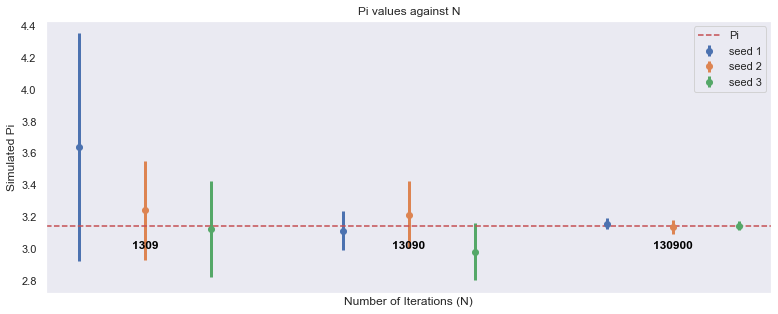

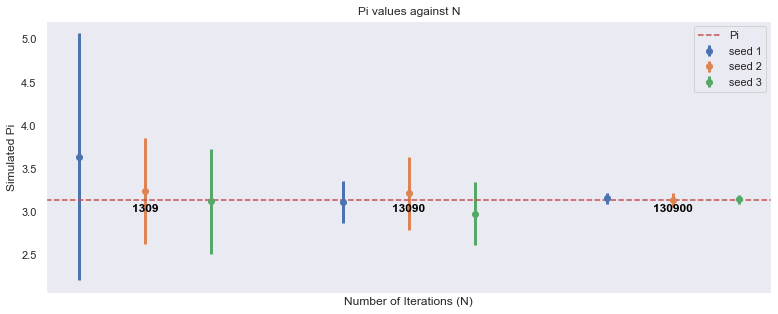

In [32]:
# number of iterations
num = ['1309','13090', '130900']
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function calcpi with Buffon function and num for number of iterations
# and store the resultant dataframe in estPi_1
# call to this function will also plot errorbars for sigma1 and sigma2 errors
estPi_1 = calcpi(Buffon,num)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runT.append(time.process_time() - start)

The first plot is the errorbars for sigma1 erros (values which are 1 standard deviation away from mean) while the second plot the errorbars covering values that are 2 standard deviations away from mean.

It is evident that for first N, seed 1 generate values of pi with high variability making its mean farther above (high standard errors) from actual pi. Mean of seed 2 is higher (higher than true pi too) than mean for seed 3 for N = 1309. The mean for seed 3 almost coincides with the actual pi. On the contrary, for second N, seed 2 generate values of pi with high variability (higher standard error) than other seeds but the mean value of approximated pi for seed 3 is farther below from actual pi than for seed 2. Mean for seed 1 for N = 13090 is almost at actual pi (slightly below). For seed 2, mean is marginally higher than red line (actual pi) while for seed 3 it is a bit more farther below the red line. For N=130900, for all the seeds the mean value coincides with red line.

We can see that as the number of iterations increase the length of errorbars decreases which suggests that variability in the values being simulated decreases, i.e., the standard error decreases and the values simulated become closer to true pi. The errorbars decrease as much as it seems like a point at the last iteration. Also, with the increase in N, we see that we get closer to the actual pi. Values simulated using seed 2 and seed 3 converges faster (at N = 1309 they have values closer to true pi) as compared to seed 1.

In [33]:
# to see the mean approximated value of pi we can print the dataframe returned
estPi_1

N      Mean    sigma1  group      diff
0    1309  3.637311  0.714793  seed1  0.495718
1   13090  3.113573  0.121076  seed1  0.028020
2  130900  3.157319  0.032821  seed1  0.015727
3    1309  3.240686  0.308622  seed2  0.099094
4   13090  3.215007  0.209621  seed2  0.073414
5  130900  3.137046  0.041520  seed2  0.004546
6    1309  3.124553  0.303708  seed3  0.017040
7   13090  2.981716  0.180180  seed3  0.159877
8  130900  3.145447  0.027513  seed3  0.003854

We can see how close we get to true pi as N increases. Sigma1 error also reduces as N increases thus indicating that variability of simulated values reduces. For N=130900, we have the lowest error, thus indicating that most of the values will be close to the mean which is also visible from the error bars plot where for this N, bars are not significantly taller than for bars for other N and almost encapsulated by a point.

To see how far the actual value of pi is from the mean of approximated pi values, we'll plot a linear plot below.

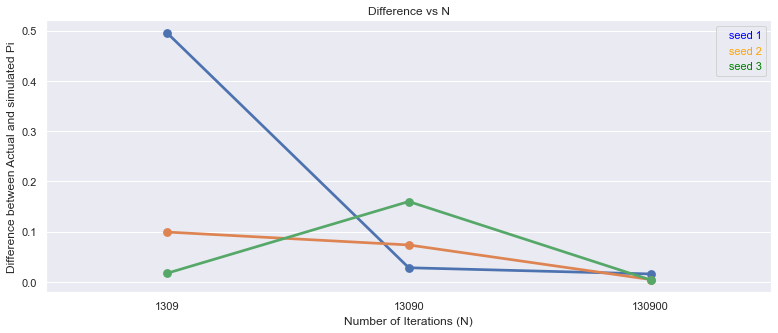

In [34]:
# to see the relation between the difference in actual & approximated pi and N (number of iterations)
linearPlot(estPi_1)

As seen from the error bars, the mean for seed 1 for N = 1309 is the farthest, it has a difference of about 0.5 from true pi while for seed 3, it is nearly 0 and for seed 2, it is 0.1. Similarly, for N = 13090, seed 3 has the highest difference from the true pi while seed 1 has a difference slightly above 0 and for seed 2 its marginally below 0.1. Lastly, for N = 130900, for all seeds the difference is almost 0. Thus, we can see the decrease in difference between the true and approximated pi as N increases.

Although we can see that there is a decrease in difference as N increases but we can't determine the rate of decrease clearly from this plot. Like for last N=130900, it seems that almost all the seeds produce same difference of 0. So to see the decrease more clearly or to zoom in on the difference, we plot the following semiLog and logLogPlot.

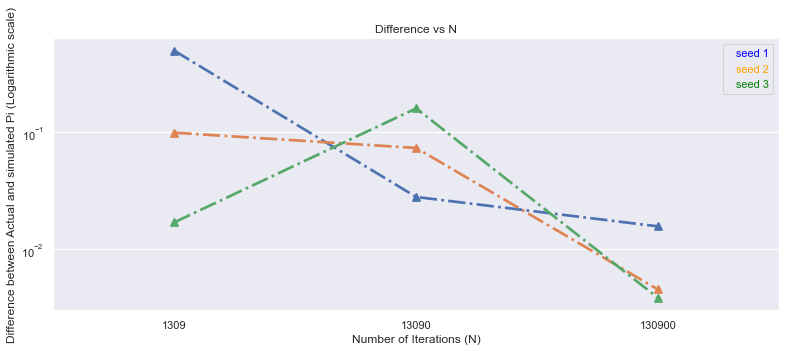

In [35]:
# to see the relation between the difference in actual & approximated pi and N (number of iterations)
# with y-axis on a log scale
semiLogPlot(estPi_1)

In [36]:
# to see the relation between the difference in actual & approximated pi and N (number of iterations)
# with both axes on a log scale
logLogPlot(estPi_1,num)

Now we can easily distinguish that for N = 130900, seed 2 and seed 3 have least diffeence as compared to seed 1. Now we can say that for all the seeds the difference between true pi and approximated pi decreases as N increases except for seed 3 for which, it increases for N = 13090 and then decreases to almost 0 for N = 130900. The rate of decrease is of the order $10^{-1}$.

***
#### Area of a Quarter Circle

We'll use AreaOfCircle() function to simulate values of 𝞹. This method takes **0.1345 seconds** to run.

0.13453099999999996


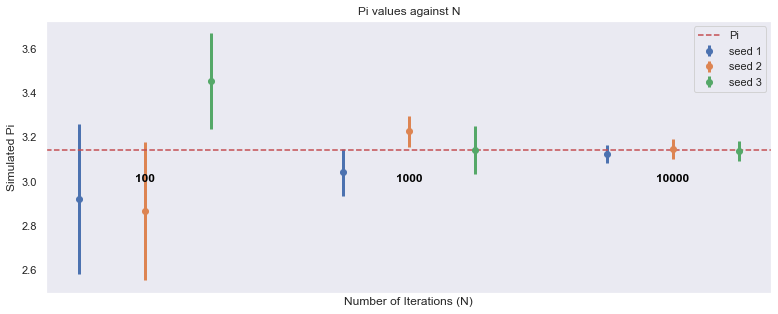

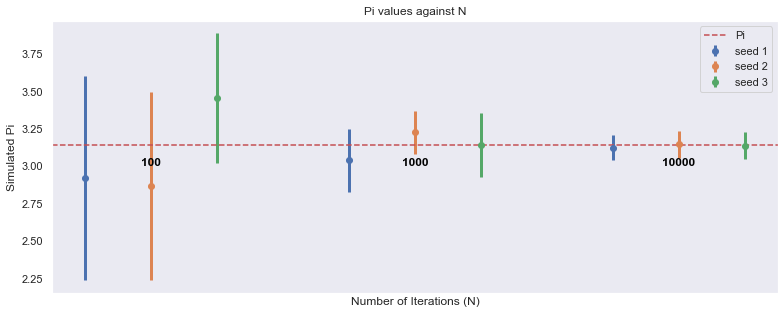

In [37]:
# number of iterations
num = ['100','1000', '10000']
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function calcpi with AreaOfCircle() function and num for number of iterations
# and store the resultant dataframe in estPi_2
# call to this function will also plot errorbars for sigma1 and sigma2 errors
estPi_2 = calcpi(AreaOfCircle,num)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runT.append(time.process_time() - start)

The first plot is the errorbars for sigma1 erros (values which are 1 standard deviation away from mean) while the second plot the errorbars covering values that are 2 standard deviations away from mean.

It is evident that for first N, seed 1 and 2 generates values with high variability (high standard errors) from pi making its mean farther down from actual pi. Mean of seed 2 and 1 (lower than true pi) is lower than mean for seed 3 (higher than true pi) for N = 100. On the contrary, for second N=$10^{3}$, seed 2 generates lesser dispersed values of pi (lower standard error) than seed 1 and seed 3. Mean for seed 3 for N = 1000 is almost at actual pi (slightly below). For seed 2, mean is marginally higher than red line (actual pi) while for seed 1 it is slightly below the red line. For N=10000, for all the seeds the mean value coincides with red line. There seems to be small variability in values of pi for N = $10^{4}$ indicating that the standard error is lower.

We can see that as the number of iterations increase the length of errorbars decreases which suggests that variability in the values being simulated decreases, i.e., the standard error decreases and the values simulated become closer to true pi. Also, with the increase in N, we see that we get closer to the actual pi. Values simulated using seed 2 and 3 converge faster (at N = 1000 they have values closer to true pi) as compared seed 1.

In [38]:
# to see the mean approximated value of pi we can print the dataframe returned
estPi_2

N      Mean    sigma1  group      diff
0    100  2.919910  0.339486  seed1  0.221682
1   1000  3.040279  0.104897  seed1  0.101313
2  10000  3.123690  0.041934  seed1  0.017903
3    100  2.865724  0.314268  seed2  0.275869
4   1000  3.225462  0.071075  seed2  0.083869
5  10000  3.146180  0.045115  seed2  0.004588
6    100  3.452735  0.216892  seed3  0.311143
7   1000  3.142170  0.107440  seed3  0.000578
8  10000  3.137361  0.043562  seed3  0.004231

We can see how close we get to true pi as N increases. Sigma1 error also reduces as N increases thus indicating that variability of simulated values reduces. For N=$10^{4}$, we have the lowest error, thus indicating that most of the values will be close to the mean which is also visible from the error bars plot where for this N, bars are not significantly taller than for bars for other N.

To see how far the actual value of pi is from the mean of approximated pi values, we'll plot a linear plot below.

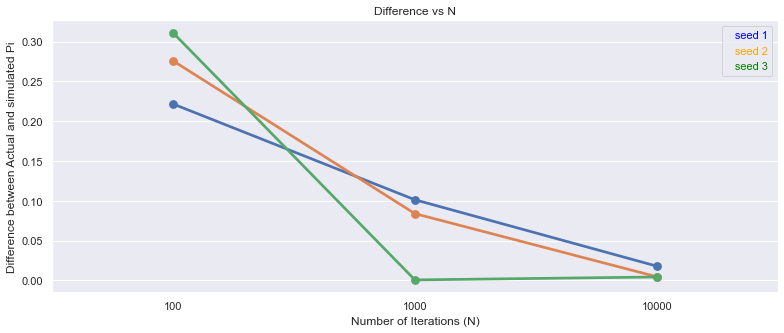

In [39]:
# to see the relation between the difference in actual & approximated pi and N (number of iterations)
linearPlot(estPi_2)

We can see that mean for N =100, for seed 3 the difference is the highest (above 0.3) followed by seed 2 (0.28) and seed 1 (0.22). Similarly, for N = $10^{3}$, seed 1 and 2 has the highest difference from the true pi (apprximately 0.1) while seed 3 has a difference slightly of almost 0. Lastly, for N = $10^{4}$, for all seeds the difference is almost 0. Although for seed 1, the difference seems marginally higher than 0. Thus, we can see the decrease in difference between the true and approximated pi as N increases.

Although we can see that there is a decrease in difference as N increases but we can't determine the rate of decrease clearly from this plot. Like for last N=$10^{4}$ it seems that almost all the seeds produce same difference of 0. So to see the decrease more clearly or to zoom in on the difference, we plot the following semiLog and logLogPlot.

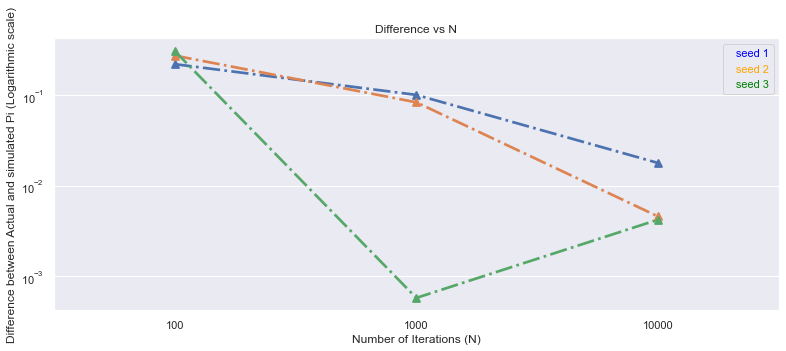

In [40]:
semiLogPlot(estPi_2)

In [41]:
logLogPlot(estPi_2,num)

Now we can easily distinguish that for N = $10^{4}$, seed 2 and seed 3 have least difference somewhere between 0.01 and 0.001 as compared to seed 1 which shows a difference which is slightly higher than 0.01. Now we can say that for all the seeds the difference between true pi and approximated pi decreases as N increases except for seed 3 for which, it decreases for N = $10^{3}$ and then increases for N = $10^{4}$. The rate of decrease is of the order $10^{-1}$.

***
#### Function Average

We'll use funcAvg() function to simulate values of 𝞹. This method takes **7.5359 seconds** to run.

7.535946000000001


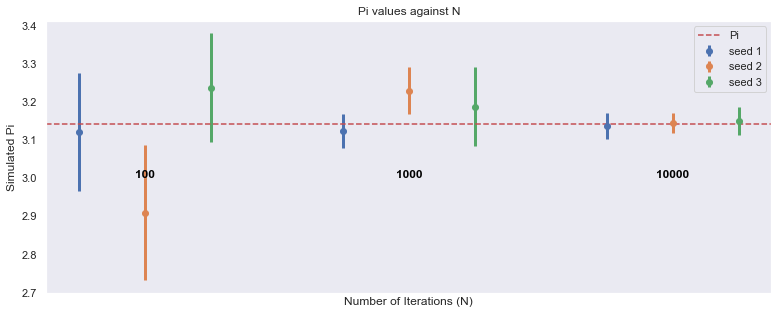

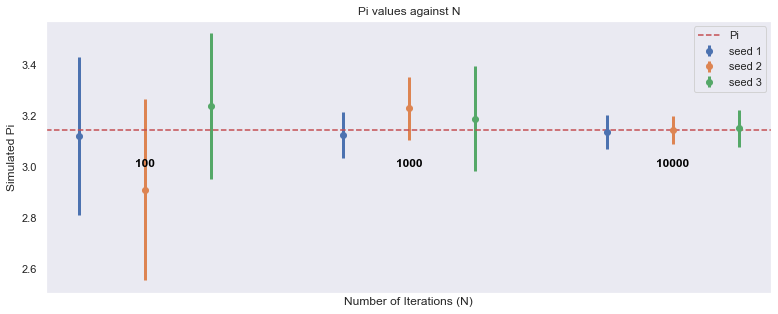

In [42]:
# number of iterations
num = ['100','1000', '10000']
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function calcpi with funcAvg() function and num for number of iterations
# and store the resultant dataframe in estPi_3
# call to this function will also plot errorbars for sigma1 and sigma2 errors
estPi_3 = calcpi(funcAvg,num)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runT.append(time.process_time() - start)

The first plot is the errorbars for sigma1 erros (values which are 1 standard deviation away from mean) while the second plot the errorbars covering values that are 2 standard deviations away from mean.

It is evident that for first N, all seeds generate values with high variability (high standard errors) from pi. Mean of seed 2 (lower than true pi) is lower than mean for seed 3 (higher than true pi) and seed 1 (almost at true pi) for N = 100. On the contrary, for second N=$10^{3}$, seed 1 generates lesser dispersed values of pi (lower standard error) than seed 2 and seed 3 (highest standard error). Mean for seed 1 for N = 1000 is almost at actual pi (slightly below). For seed 2 and 3, mean is marginally higher than red line (actual pi). For N=10000, for all the seeds the mean value coincides with red line. There seems to be small variability in values of pi for N = $10^{4}$ indicating that the standard error is lower.

We can see that as the number of iterations increase the length of errorbars decreases which suggests that variability in the values being simulated decreases, i.e., the standard error decreases and the values simulated become closer to true pi. Also, with the increase in N, we see that we get closer to the actual pi. Values simulated using seed 1 converges faster (even at N=100, it produces a mean close to true pi) as compared to other seeds.

In [43]:
# to see the mean approximated value of pi we can print the dataframe returned
estPi_3

N      Mean    sigma1  group      diff
0    100  3.121450  0.154808  seed1  0.020142
1   1000  3.123887  0.044890  seed1  0.017706
2  10000  3.134934  0.034030  seed1  0.006659
3    100  2.908754  0.177313  seed2  0.232839
4   1000  3.228557  0.062046  seed2  0.086964
5  10000  3.143849  0.026823  seed2  0.002256
6    100  3.236079  0.142920  seed3  0.094487
7   1000  3.187103  0.102689  seed3  0.045510
8  10000  3.149683  0.036835  seed3  0.008090

We can see how close we get to true pi as N increases. Sigma1 error also reduces as N increases thus indicating that variability of simulated values reduces. For N=$10^{4}$, we have the lowest error, thus indicating that most of the values will be close to the mean which is also visible from the error bars plot where for this N, bars are not significantly taller than for bars for other N.

To see how far the actual value of pi is from the mean of approximated pi values, we'll plot a linear plot below.

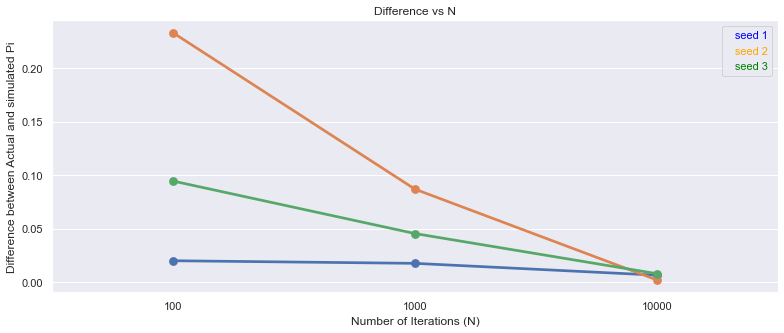

In [44]:
linearPlot(estPi_3)

We can see that mean for N =100, for seed 2 the difference is the highest (above 0.2) followed by seed 3 (apprximately 0.1) and seed 1 (slightly above 0). Similarly, for N = $10^{3}$, seed 2 has the highest difference from the true pi (apprximately 0.1) while seed 3 has a difference slightly of 0.05 and seed 1 with slightly above 0. Lastly, for N = $10^{4}$, for all seeds the difference is almost 0. For seed 1, the difference seems to be constant for all iterations. Thus, we can see the decrease in difference between the true and approximated pi as N increases.

Although we can see that there is a decrease in difference as N increases but we can't determine the rate of decrease clearly from this plot. Like for last N=$10^{4}$ it seems that almost all the seeds produce same difference of 0. So to see the decrease more clearly or to zoom in on the difference, we plot the following semiLog and logLogPlot.

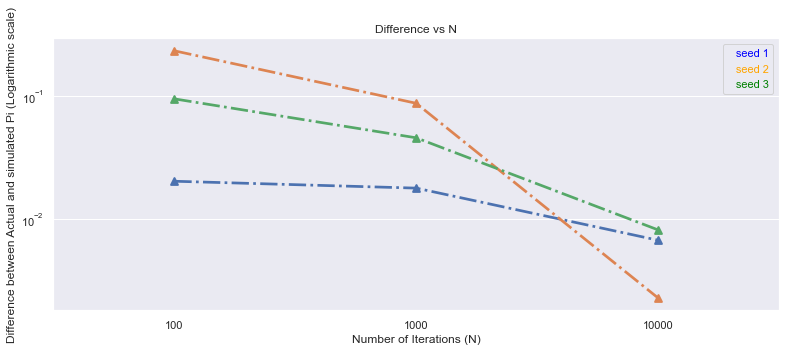

In [45]:
semiLogPlot(estPi_3)

In [46]:
logLogPlot(estPi_3,num)

Now we can easily distinguish that for N = $10^{4}$, seed 3 and seed 1 have higher differences slightly below 0.01 as compared to seed 2 which shows a difference which is significantly lower than 0.01. Now we can say that for all the seeds the difference between true pi and approximated pi decreases as N increases. The rate of decrease is of the order $10^{-1}$.

***
#### Gamma Function Integral

We'll use MCInt1() function to simulate values of 𝞹. This method takes **5.601 seconds** to run.

5.6014289999999995


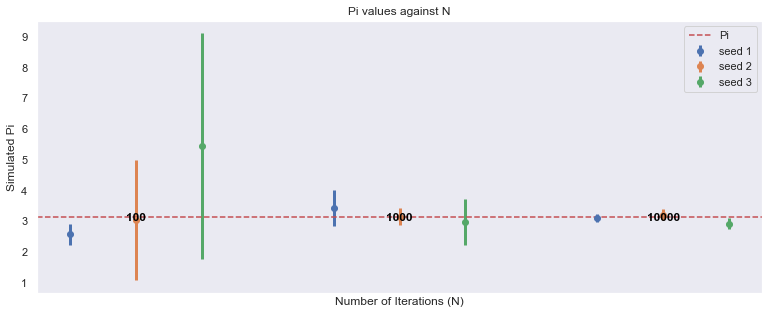

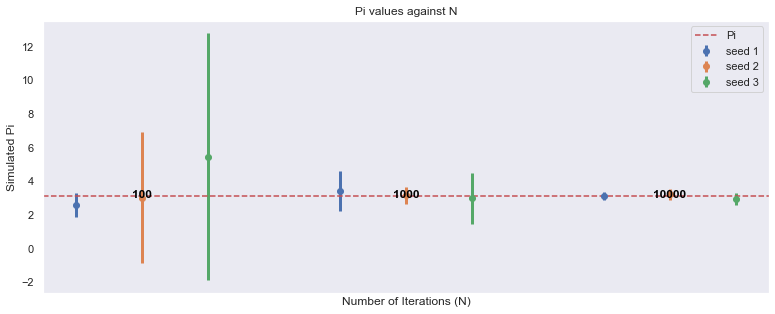

In [47]:
# number of iterations
num = ['100','1000', '10000']
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function calcpi with MCInt1() function and num for number of iterations
# and store the resultant dataframe in estPi_4
# call to this function will also plot errorbars for sigma1 and sigma2 errors
estPi_4 = calcpi(MCInt1,num)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runT.append(time.process_time() - start)

The first plot is the errorbars for sigma1 erros (values which are 1 standard deviation away from mean) while the second plot the errorbars covering values that are 2 standard deviations away from mean.

It is evident that for first N, seed 3 generate values with highest variability (high standard errors) from pi. While seed 1 doesn't seem to have much variability in the values of pi seed 2 seems to have high variability. Mean of seed 1 (lower than true pi) is lower than mean for seed 3 (higher than true pi) and seed 2 (almost at true pi) for N = 100. On the contrary, for second N=$10^{3}$, seed 2 generates lesser dispersed values of pi (lower standard error) than seed 1 and seed 3 (higher standard error). Mean for all seeds for N = 1000 is almost at true pi. For N=10000, for all the seeds the mean value coincides with red line. There seems to be negligible variability in values of pi for N = $10^{4}$ indicating that the standard errors are lower for all.

We can see that as the number of iterations increase the length of errorbars decreases which suggests that variability in the values being simulated decreases, i.e., the standard error decreases and the values simulated become closer to true pi. Also, with the increase in N, we see that we get closer to the actual pi. Values simulated using seed 1 and seed 2 converge faster (even at N=100, they produce a mean close to true pi) as compared to seed 3 .

In [48]:
# to see the mean approximated value of pi we can print the dataframe returned
estPi_4

N      Mean    sigma1  group      diff
0    100  2.572405  0.350782  seed1  0.569188
1   1000  3.430325  0.594166  seed1  0.288733
2  10000  3.103931  0.118576  seed1  0.037661
3    100  3.024628  1.951346  seed2  0.116965
4   1000  3.144936  0.266756  seed2  0.003343
5  10000  3.214602  0.171004  seed2  0.073010
6    100  5.439617  3.668676  seed3  2.298025
7   1000  2.977154  0.750249  seed3  0.164439
8  10000  2.920499  0.178836  seed3  0.221093

We can see how close we get to true pi as N increases. Sigma1 error also reduces as N increases thus indicating that variability of simulated values reduces. For N=$10^{4}$, we have the lowest error, thus indicating that most of the values will be close to the mean which is also visible from the error bars plot where for this N, bars are not significantly taller than for bars for other N and almost encapsulated by a point.

To see how far the actual value of pi is from the mean of approximated pi values, we'll plot a linear plot below.

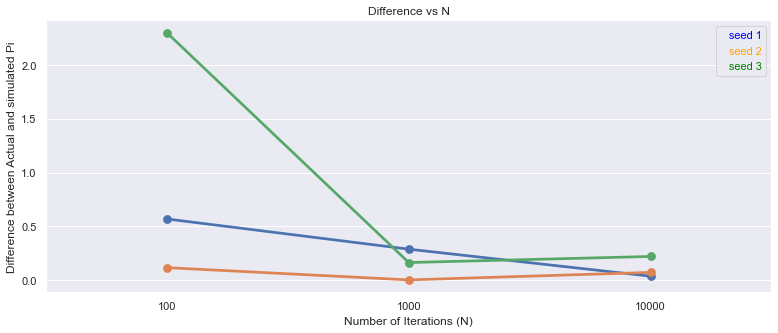

In [49]:
linearPlot(estPi_4)

We can see that mean for N =100, for seed 3 the difference is the highest (above 2) followed by seed 1 (approximately 0.5) and seed 2 (slightly above 0). Similarly, for N = $10^{3}$, the difference is between 0 and 0.5 for all seeds with seed 1 having the highest difference followed by seed 3 (approximately 0.3) while seed 2 has a difference of almost 0. Lastly, for N = $10^{4}$, for seed 1 and 2 the difference is almost 0 while for seed 3, it is around 0.3. For seed 2, the difference seems to be constant and almost 0 for all iterations. Thus, we can see the decrease in difference between the true and approximated pi as N increases.

Although we can see that there is a decrease in difference as N increases but we can't determine the rate of decrease clearly from this plot. Like for last N=$10^{4}$ it seems that almost all the seeds produce same difference of 0. So to see the decrease more clearly or to zoom in on the difference, we plot the following semiLog and logLogPlot.

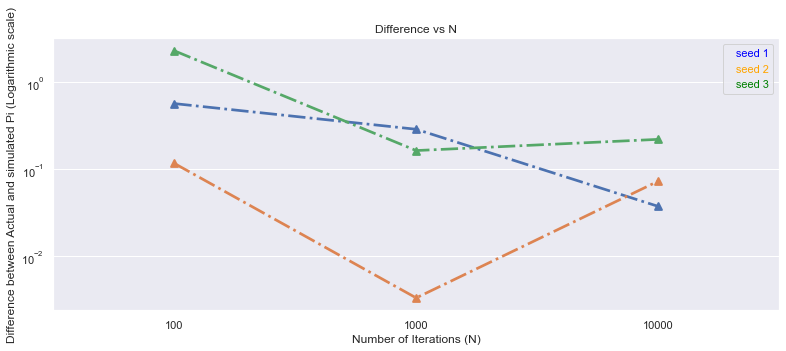

In [50]:
semiLogPlot(estPi_4)

In [51]:
logLogPlot(estPi_4,num)

Now we can easily distinguish that for N = $10^{4}$, seed 3 has highest difference slightly above 0.1 as compared to seed 2 and seed 1 which show a difference which is marginally lower than 0.1. Now we can say that for seed 1 the difference between true pi and approximated pi decreases as N increases while for seed 2 and 3, it decreases for N = $10^{3}$ and then increases for N = $10^{4}$.. The rate of decrease is of the order $10^{-1}$.

#### Change of Variables

We'll use MCInt2() function to simulate values of 𝞹. This method takes **7.538 seconds** to run.

7.538629999999998


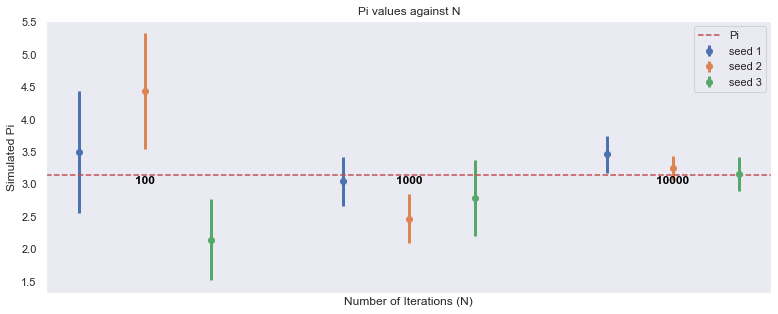

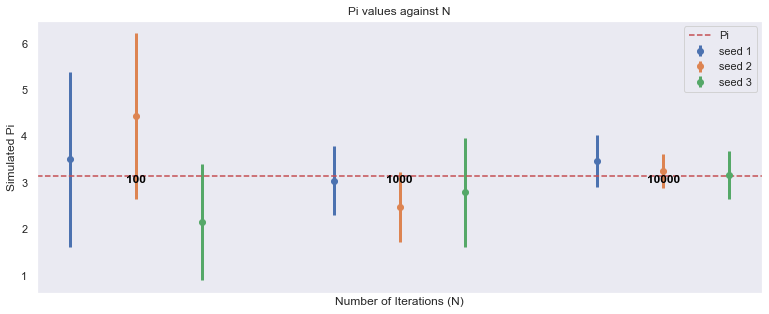

In [52]:
# number of iterations
num = ['100','1000', '10000']
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function calcpi with MCInt2() function and num for number of iterations
# and store the resultant dataframe in estPi_5
# call to this function will also plot errorbars for sigma1 and sigma2 errors
estPi_5 = calcpi(MCInt2,num)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runT.append(time.process_time() - start)

The first plot is the errorbars for sigma1 erros (values which are 1 standard deviation away from mean) while the second plot the errorbars covering values that are 2 standard deviations away from mean.

It is evident that for first N, all seeds generate values with high variability (high standard errors) from pi. Mean of seed 3 (lower than true pi) is lower than mean for seed 1 and seed 2 (higher than true pi) for N = 100. On the contrary, for second N=$10^{3}$, all seeds generates lesser dispersed values of pi (lower standard error) than for N=100. Mean for seeds 2 and 3 for N = 1000 are lower at true pi while for seed 1 it is almost at true pi. For N=10000, for seeds 2 and 3 the mean value coincides with red line while for seed 1 it is slightly higher than true pi. There seems to be small variability in values of pi for N = $10^{4}$ indicating that the standard errors are lower for all.

We can see that as the number of iterations increase the length of errorbars decreases which suggests that variability in the values being simulated decreases, i.e., the standard error decreases and the values simulated become closer to true pi. Also, with the increase in N, we see that we get closer to the actual pi. Values simulated using seed 1 always have mean closer to true pi so they converge faster as compared to seed 2 and seed 3. 

In [53]:
# to see the mean approximated value of pi we can print the dataframe returned
estPi_5

N      Mean    sigma1  group      diff
0    100  3.498419  0.940481  seed1  0.356826
1   1000  3.043056  0.373673  seed1  0.098536
2  10000  3.457974  0.281342  seed1  0.316382
3    100  4.431291  0.891615  seed2  1.289698
4   1000  2.471072  0.379481  seed2  0.670520
5  10000  3.243091  0.185557  seed2  0.101498
6    100  2.145675  0.626786  seed3  0.995918
7   1000  2.788248  0.589657  seed3  0.353345
8  10000  3.157639  0.257736  seed3  0.016047

We can see how close we get to true pi as N increases. Sigma1 error also reduces as N increases thus indicating that variability of simulated values reduces. For N=$10^{4}$, we have the lowest error, thus indicating that most of the values will be close to the mean which is also visible from the error bars plot where for this N, bars are not significantly taller than for bars for other N.

To see how far the actual value of pi is from the mean of approximated pi values, we'll plot a linear plot below.

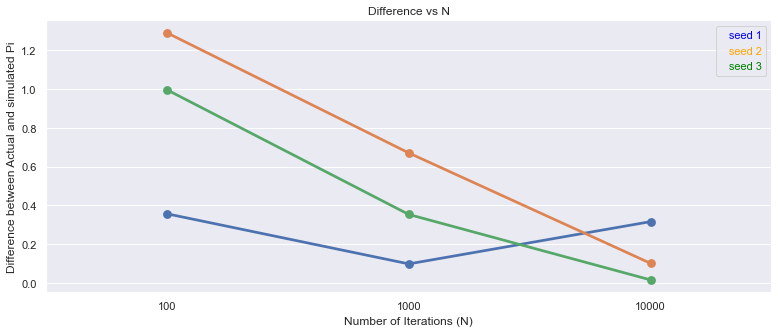

In [54]:
linearPlot(estPi_5)

We can see that mean for N =100, for seed 2 the difference is the highest (above 1.2) followed by seed 3 (at 1) and seed 1 (slightly below 0.4). Similarly, for N = $10^{3}$, the difference is highest for seed 2 (slightly above 0.6) followed by seed 3 (approximately 0.4) while seed 1 has a difference of almost 0.1. Lastly, for N = $10^{4}$, for seed 3 the difference is almost 0 while for seed 2, it is around 0.1. For seed 1, the difference is closer to 0.4. Thus, we can see the decrease in difference between the true and approximated pi as N increases.

Although we can see that there is a decrease in difference as N increases but we can't determine the rate of decrease clearly from this plot. Like for last N=$10^{4}$ it seems that seeds 2 and 3 produce difference closer to 0. So to see the decrease more clearly or to zoom in on the difference, we plot the following semiLog and logLogPlot.

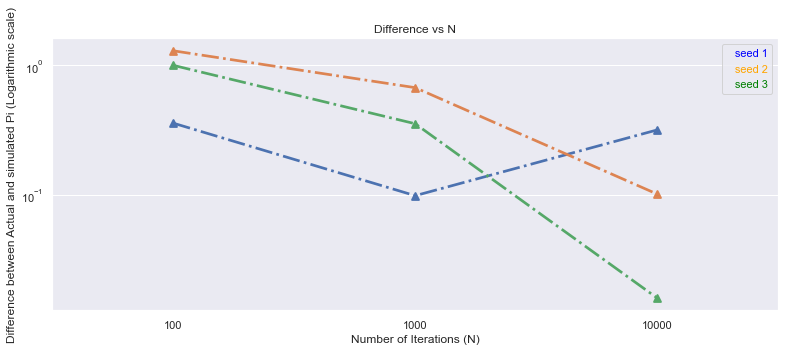

In [51]:
semiLogPlot(estPi_5)

In [55]:
logLogPlot(estPi_5,num)

Now we can easily distinguish that for N = $10^{4}$, seed 1 has highest difference above 0.1 as compared to seed 2 which has difference of 0.1 and seed 3 which show a difference significantly lower than 0.1. Now we can say that for seeds 2 and 3 the difference between true pi and approximated pi decreases as N increases while for seed 1, it decreases for N = $10^{3}$ and then increases for N = $10^{4}$.. The rate of decrease is of the order $10^{-1}$.

***
#### Integrals

We'll use MCInt3() function to simulate values of 𝞹. This method takes **5.644 seconds** to run.

5.6448740000000015


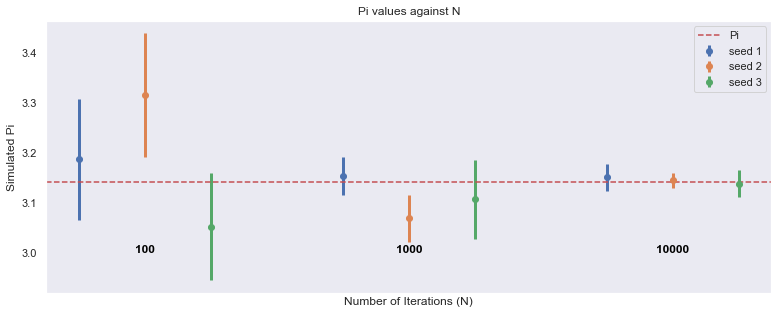

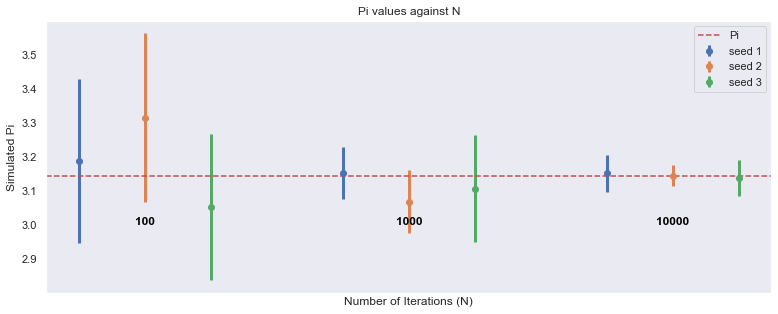

In [56]:
# number of iterations
num = ['100','1000', '10000']
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function calcpi with MCInt3() function and num for number of iterations
# and store the resultant dataframe in estPi_6
# call to this function will also plot errorbars for sigma1 and sigma2 errors
estPi_6 = calcpi(MCInt3,num)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runT.append(time.process_time() - start)

The first plot is the errorbars for sigma1 erros (values which are 1 standard deviation away from mean) while the second plot the errorbars covering values that are 2 standard deviations away from mean.

It is evident that for first N, all seeds generate values with high variability (high standard errors) from pi. Mean of seed 3 (lower than true pi) is lower than mean for seed 1 and seed 2 (higher than true pi) for N = 100. On the contrary, for second N=$10^{3}$, all seeds generates lesser dispersed values of pi (lower standard error) than for N=100. Mean for seeds 2 and 3 for N = 1000 are lower at true pi while for seed 1 it is almost at true pi. For N=10000, for all seeds the mean value coincides with red line. There seems to be small variability in values of pi for N = $10^{4}$ indicating that the standard errors are lower for all.

We can see that as the number of iterations increase the length of errorbars decreases which suggests that variability in the values being simulated decreases, i.e., the standard error decreases and the values simulated become closer to true pi. Also, with the increase in N, we see that we get closer to the actual pi. Values simulated using seed 1 always have mean closer to true pi so they converge faster as compared to seed 2 and seed 3. 

In [57]:
# to see the mean approximated value of pi we can print the dataframe returned
estPi_6

N      Mean    sigma1  group      diff
0    100  3.185809  0.120319  seed1  0.044216
1   1000  3.152125  0.038466  seed1  0.010532
2  10000  3.150371  0.026803  seed1  0.008778
3    100  3.314696  0.123660  seed2  0.173103
4   1000  3.067974  0.046634  seed2  0.073619
5  10000  3.144166  0.015256  seed2  0.002573
6    100  3.050913  0.107214  seed3  0.090680
7   1000  3.106073  0.078965  seed3  0.035520
8  10000  3.137403  0.026776  seed3  0.004190

We can see how close we get to true pi as N increases. Sigma1 error also reduces as N increases thus indicating that variability of simulated values reduces. For N=$10^{4}$, we have the lowest error, thus indicating that most of the values will be close to the mean which is also visible from the error bars plot where for this N, bars are not significantly taller than for other N.

To see how far the actual value of pi is from the mean of approximated pi values, we'll plot a linear plot below.

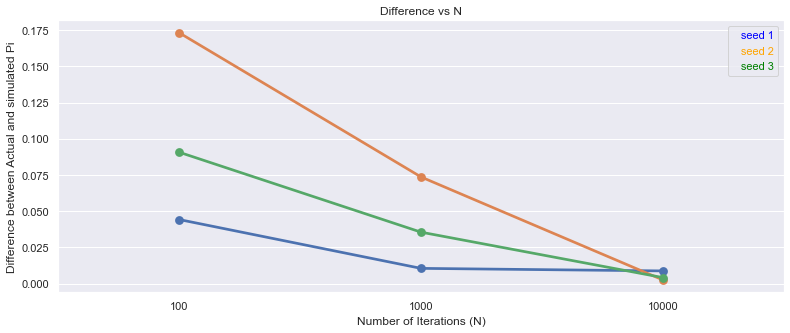

In [58]:
linearPlot(estPi_6)

We can see that mean for N =100, for seed 2 the difference is the highest (above 0.175) followed by seed 3 (below 0.1) and seed 1 (slightly below 0.05). Similarly, for N = $10^{3}$, the difference is highest for seed 2 (0.075) followed by seed 3 (above 0.025) while seed 1 has a difference of almost 0. Lastly, for N = $10^{4}$, for all seeds, the difference is almost 0. Thus, we can see the decrease in difference between the true and approximated pi as N increases.

Although we can see that there is a decrease in difference as N increases but we can't determine the rate of decrease clearly from this plot. Like for last N=$10^{4}$ it seems that all seeds produce difference closer to 0. So to see the decrease more clearly or to zoom in on the difference, we plot the following semiLog and logLogPlot.

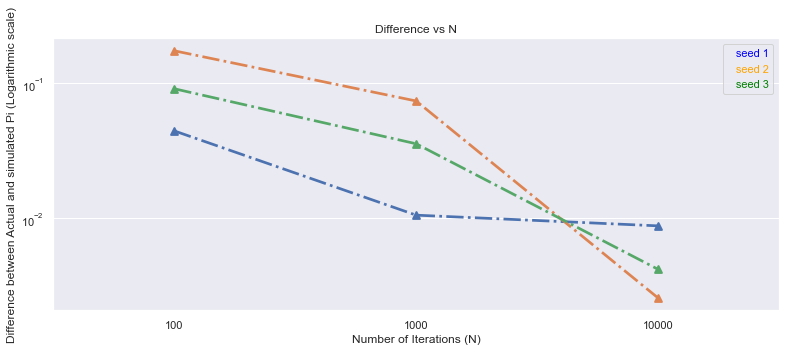

In [57]:
semiLogPlot(estPi_6)

In [59]:
logLogPlot(estPi_6,num)

Now we can easily distinguish that for N = $10^{4}$, seed 1 has highest difference of 0.01 as compared to seed 2 and seed 3 which show a difference significantly lower than 0.01. Now we can say that for all the difference between true pi and approximated pi decreases as N increases while for seed 1, it decreases for N = $10^{3}$ and then increases for N = $10^{4}$.. The rate of decrease is of the order $10^{-1}$.

#### Change of Variables

We'll use MCInt4() function to simulate values of 𝞹. This method takes **7.580 seconds** to run.

7.580126


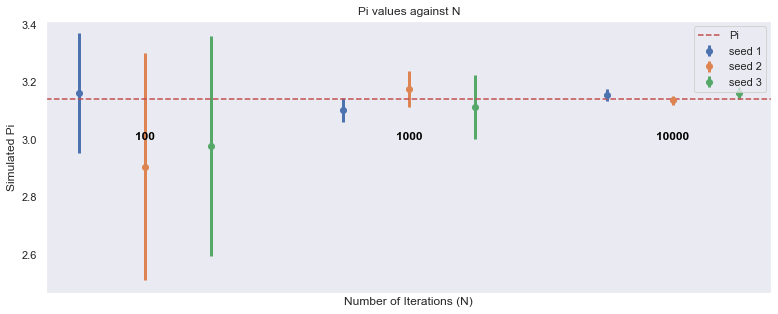

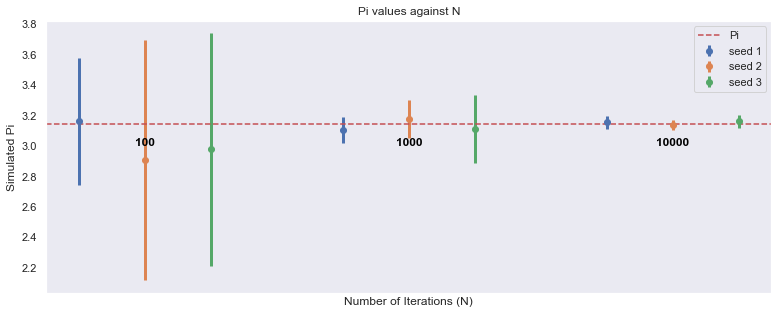

In [60]:
# number of iterations
num = ['100','1000', '10000']
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function calcpi with MCInt4() function and num for number of iterations
# and store the resultant dataframe in estPi_7
# call to this function will also plot errorbars for sigma1 and sigma2 errors
estPi_7 = calcpi(MCInt4,num)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runT.append(time.process_time() - start)

The first plot is the errorbars for sigma1 erros (values which are 1 standard deviation away from mean) while the second plot the errorbars covering values that are 2 standard deviations away from mean.

It is evident that for first N, seed 3 and 2 generate values with highest variability (high standard errors) from pi. While seed 1 have comparitively smaller variability in the values of pi. Mean of seed 2 and 3 (lower than true pi) is lower than mean for seed 1 (almost at true pi) for N = 100. On the contrary, for second N=$10^{3}$, seed 1 generates lesser dispersed values of pi (lower standard error) than seed 2 and seed 3 (higher standard error). Mean for all seeds for N = 1000 is almost at true pi. For N=10000, for all the seeds the mean value coincides with red line. There seems to be negligible variability in values of pi for N = $10^{4}$ indicating that the standard errors are lower for all.

We can see that as the number of iterations increase the length of errorbars decreases which suggests that variability in the values being simulated decreases, i.e., the standard error decreases and the values simulated become closer to true pi. Also, with the increase in N, we see that we get closer to the actual pi. Values simulated using seed 1 converges faster (even at N=100, it produce a mean close to true pi) as compared to seed 2 and 3.

In [61]:
# to see the mean approximated value of pi we can print the dataframe returned
estPi_7

N      Mean    sigma1  group      diff
0    100  3.159881  0.208520  seed1  0.018288
1   1000  3.101501  0.042109  seed1  0.040092
2  10000  3.154332  0.020644  seed1  0.012739
3    100  2.904988  0.394757  seed2  0.236605
4   1000  3.173796  0.062597  seed2  0.032203
5  10000  3.135786  0.015536  seed2  0.005807
6    100  2.976051  0.381394  seed3  0.165542
7   1000  3.113241  0.111763  seed3  0.028352
8  10000  3.161070  0.021270  seed3  0.019478

We can see how close we get to true pi as N increases. Sigma1 error also reduces as N increases thus indicating that variability of simulated values reduces. For N=$10^{4}$, we have the lowest error, thus indicating that most of the values will be close to the mean which is also visible from the error bars plot where for this N, bars are not significantly taller than for bars for other N and are almost encapsulated by the point.

To see how far the actual value of pi is from the mean of approximated pi values, we'll plot a linear plot below.

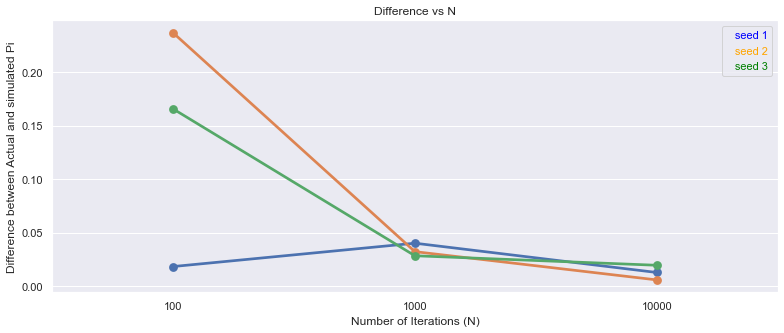

In [62]:
linearPlot(estPi_7)

We can see that mean for N =100, for seed 2 the difference is the highest (above 0.2) followed by seed 3 (above 0.15) and seed 1 (below 0.05 almost 0). Similarly, for N = $10^{3}$, the difference is almost same for all seeds (marginally below 0.05). Lastly, for N = $10^{4}$, for all seeds, the difference is almost 0. Thus, we can see the decrease in difference between the true and approximated pi as N increases.

Although we can see that there is a decrease in difference as N increases but we can't determine the rate of decrease clearly from this plot. Like for last N=$10^{4}$ it seems that all seeds produce difference closer to 0. So to see the decrease more clearly or to zoom in on the difference, we plot the following semiLog and logLogPlot.

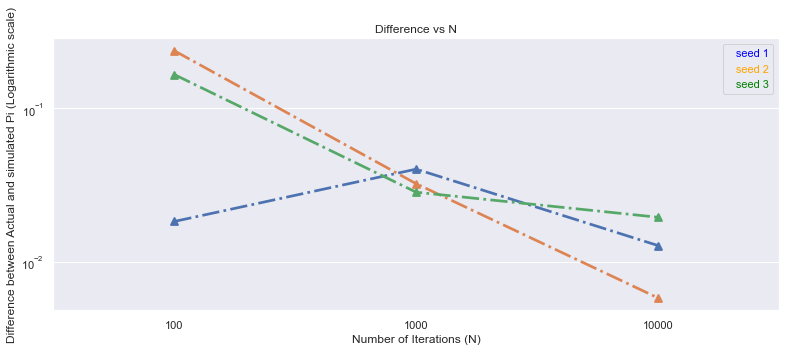

In [62]:
semiLogPlot(estPi_7)

In [63]:
logLogPlot(estPi_7,num)

Now we can easily distinguish that for N = $10^{4}$, seed 3 has highest difference above 0.01 as compared to seed 2 (slightly above 0.01) and seed 1 which show a difference which is marginally lower than 0.1. Now we can say that for seed 2 and 3 the difference between true pi and approximated pi decreases as N increases while for seed 1, it increases for N = $10^{3}$ and then decreases for N = $10^{4}$. The rate of decrease is of the order $10^{-1}$.

***
#### Probability Calculation

We'll use probFunc() function to simulate values of 𝞹. This method takes **5.434 seconds** to run.

5.434356000000001


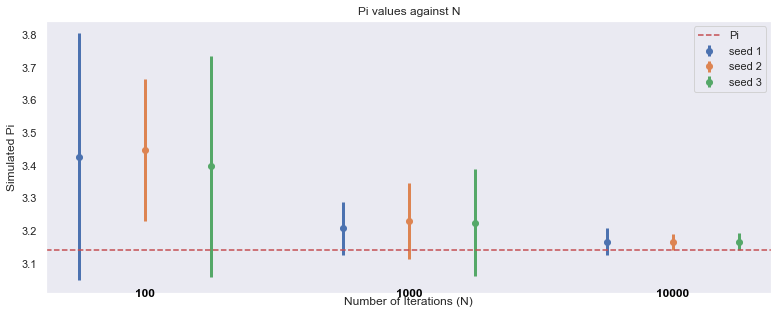

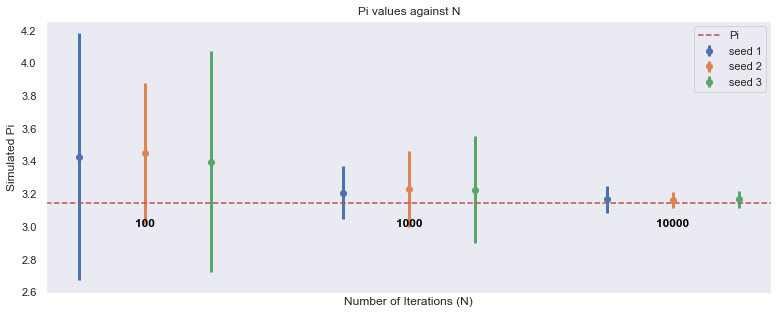

In [64]:
# number of iterations
num = ['100','1000', '10000']
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function calcpi with probFunc() function and num for number of iterations
# and store the resultant dataframe in estPi_8
# call to this function will also plot errorbars for sigma1 and sigma2 errors
estPi_8 = calcpi(probFunc,num)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runT.append(time.process_time() - start)

The first plot is the errorbars for sigma1 erros (values which are 1 standard deviation away from mean) while the second plot the errorbars covering values that are 2 standard deviations away from mean.

It is evident that for first N, seed 3 and 1 generate values with highest variability (high standard errors) from pi. While seed 2 have comparitively smaller variability in the values of pi. Mean of all seeds are greater than true pi for N = 100. Similarly, for second N=$10^{3}$, seeds generates lesser dispersed values of pi (lower standard error) than N = 100. Mean for all seeds for N = 1000 is moderately high than true pi. For N=10000, for all the seeds the mean value coincides with red line. There seems to be negligible variability in values of pi for N = $10^{4}$ indicating that the standard errors are lower for all.

We can see that as the number of iterations increase the length of errorbars decreases which suggests that variability in the values being simulated decreases, i.e., the standard error decreases and the values simulated become closer to true pi. Also, with the increase in N, we see that we get closer to the actual pi. Values simulated for all seeds converge to true pi at N = $10^{4}$. All of the seeds converge to true at N = 10000.

In [65]:
# to see the mean approximated value of pi we can print the dataframe returned
estPi_8

N      Mean    sigma1  group      diff
0    100  3.426394  0.377876  seed1  0.284801
1   1000  3.208185  0.081102  seed1  0.066592
2  10000  3.166680  0.041187  seed1  0.025088
3    100  3.447511  0.216266  seed2  0.305918
4   1000  3.229340  0.116567  seed2  0.087747
5  10000  3.164790  0.024593  seed2  0.023197
6    100  3.397441  0.338309  seed3  0.255848
7   1000  3.224950  0.164160  seed3  0.083357
8  10000  3.166893  0.025771  seed3  0.025301

We can see how close we get to true pi as N increases. Sigma1 error also reduces as N increases thus indicating that variability of simulated values reduces. For N=$10^{4}$, we have the lowest error, thus indicating that most of the values will be close to the mean which is also visible from the error bars plot where for this N, bars are not significantly taller than for bars for other N.

To see how far the actual value of pi is from the mean of approximated pi values, we'll plot a linear plot below.

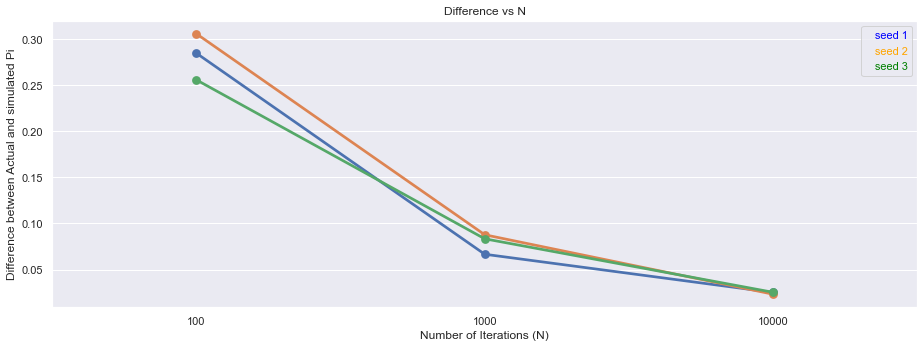

In [119]:
linearPlot(estPi_8)

We can see that mean for N =100, for seed 2 the difference is the highest (above 0.3) followed by seed 1 (below 0.30) and seed 3 (almost 0.25). Similarly, for N = $10^{3}$, the difference is almost same for all seeds 2 and 3 (marginally below 0.1) while for seed 1 it is just slightly above 0.05. Lastly, for N = $10^{4}$, for all seeds, the difference is below 0.05 (presumably close to 0). Thus, we can see the decrease in difference between the true and approximated pi as N increases.

Although we can see that there is a decrease in difference as N increases but we can't determine the rate of decrease clearly from this plot. Like for last N=$10^{4}$ it seems that all seeds produce difference closer to 0. So to see the decrease more clearly or to zoom in on the difference, we plot the following semiLog and logLogPlot.

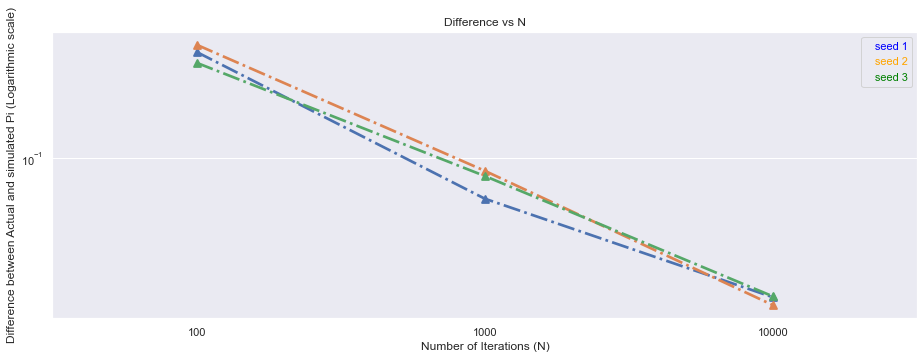

In [120]:
semiLogPlot(estPi_8)

In [66]:
logLogPlot(estPi_8,num)

Now we can easily distinguish that for N = $10^{4}$, all seeds have difference substantially lower than 0.1. Although seed 2 has lowest difference (slightly above 0.01) but there is negligible distinction. Now we can say that for all seeds the difference between true pi and approximated pi decreases as N increases (almost straight line with negative slope). The rate of decrease is of the order $10^{-1}$.

***
#### Cesàro's theorem

We'll use calculateProbability() function to simulate values of 𝞹. This method takes **0.154 seconds** to run.

0.15469999999999828


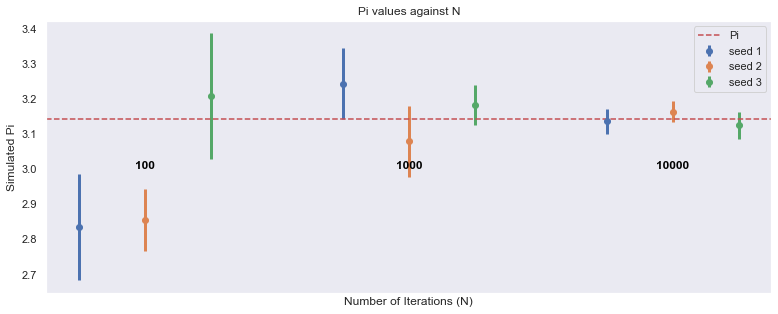

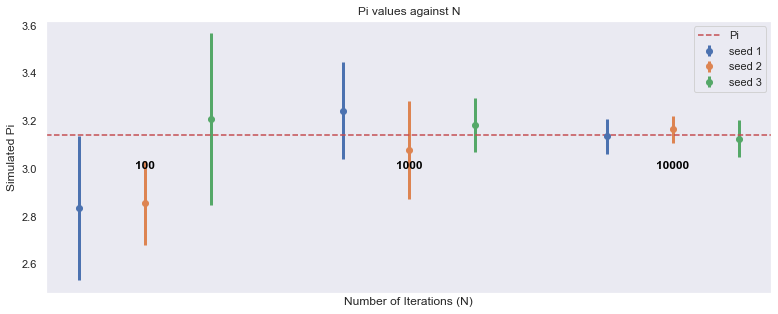

In [67]:
# number of iterations
num = ['100','1000', '10000']
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function calcpi with calculateProbability() function and num for number of iterations
# and store the resultant dataframe in estPi_9
# call to this function will also plot errorbars for sigma1 and sigma2 errors
estPi_9 = calcpi(calculateProbability,num)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runT.append(time.process_time() - start)

The first plot is the errorbars for sigma1 erros (values which are 1 standard deviation away from mean) while the second plot the errorbars covering values that are 2 standard deviations away from mean.

It is evident that for first N, seed 1 and 3 generate values with highest variability (high standard errors) from pi. While seed 2 have comparitively smaller variability in the values of pi. Mean of seed 1 and 2 (lower than true pi) is lower than mean for seed 1 (above true pi) for N = 100. On the contrary, for second N=$10^{3}$, seed 3 generates lesser dispersed values of pi (lower standard error) than seed 1 and seed 2 (higher standard error). Mean for all seeds for N = 1000 are closer to true pi (seed 1 and 3 have mean marginally above red line while seed 2 just below). For N=10000, for all the seeds the mean value coincides with red line. There seems to be negligible variability in values of pi for N = $10^{4}$ indicating that the standard errors are lower for all.

We can see that as the number of iterations increase the length of errorbars decreases which suggests that variability in the values being simulated decreases, i.e., the standard error decreases and the values simulated become closer to true pi. Also, with the increase in N, we see that we get closer to the actual pi. Values simulated using seed 2 and 3 converges faster (even at N=1000, it produce a mean close to true pi) as compared to seed 1.

In [133]:
# to see the mean approximated value of pi we can print the dataframe returned
estPi_9

N      Mean    sigma1  group      diff
0    100  2.833650  0.151148  seed1  0.307942
1   1000  3.243023  0.101648  seed1  0.101430
2  10000  3.135544  0.036689  seed1  0.006048
3    100  2.855189  0.088551  seed2  0.286403
4   1000  3.078670  0.102436  seed2  0.062923
5  10000  3.163639  0.029032  seed2  0.022046
6    100  3.207366  0.179589  seed3  0.065774
7   1000  3.182300  0.056516  seed3  0.040708
8  10000  3.125185  0.038623  seed3  0.016408

We can see how close we get to true pi as N increases. Sigma1 error also reduces as N increases thus indicating that variability of simulated values reduces. For N=$10^{4}$, we have the lowest error, thus indicating that most of the values will be close to the mean which is also visible from the error bars plot where for this N, bars are not significantly taller than for bars for other N.

To see how far the actual value of pi is from the mean of approximated pi values, we'll plot a linear plot below.

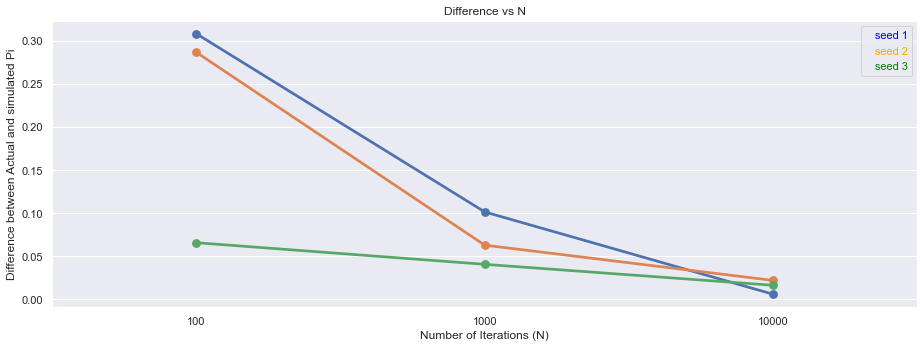

In [134]:
linearPlot(estPi_9)

We can see that mean for N =100, for seed 1 the difference is the highest (above 0.3) followed by seed 2 (below 0.3) and seed 3 (slighttly above 0.05). Similarly, for N = $10^{3}$, the difference is highest for seed 1 (0.1) while for seed 2, it's just above 0.05 and seed 3 at almost 0.05. Lastly, for N = $10^{4}$, for all seeds, the difference is below 0.05 (presumably close to 0). Thus, we can see the decrease in difference between the true and approximated pi as N increases.

Although we can see that there is a decrease in difference as N increases but we can't determine the rate of decrease clearly from this plot. Like for last N=$10^{4}$ it seems that all seeds produce difference closer to 0. So to see the decrease more clearly or to zoom in on the difference, we plot the following semiLog and logLogPlot.

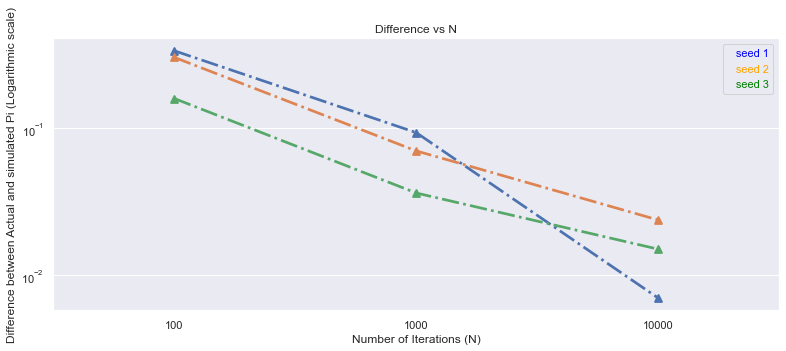

In [73]:
semiLogPlot(estPi_9)

In [68]:
logLogPlot(estPi_9,num)

Now we can easily distinguish that for N = $10^{4}$, seed 2 has highest difference above 0.01 as compared to seed 3 (just slightly above 0.01) and seed 1 which show a difference which is marginally lower than 0.01. Now we can say that for all seeds the difference between true pi and approximated pi decreases as N increases. The rate of decrease is of the order $10^{-1}$.

***
### Additional Simulations

In this section we'll run the functions for N = $10^{5}$ (previously we ran for $10^{2}$, $10^{3}$, $10^{4}$) since $10^{5}$ will take longer than these N to evaluate for 3 seeds. So we'll run them just once. For Buffon's we'll run for N = 1309000. 

Before running the following code blocks, please note the run time of each block below it. Also, if you want to run for higher N, you can change the value of N in the code block (the first non commented line). 

In [69]:
# this list will store the runtime for the functions for 100000
runTime = []

#### Buffon's Needle

We will run the Buffon's function for N = 1309000 and print the time it took to run the simulations.

In [70]:
# number of iterations
N = 1309000
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function Buffon() with N for number of iterations
# it will return simulated values of pi
pi_B = Buffon(N)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runTime.append(time.process_time() - start)

3.380918000000001


As we can see this function took merely **3.380 seconds** to complete N = 1309000 simulations and simulations are stored in pi_B.

***
#### Area of a Quarter Circle

We will run AreaOfCircle() function for N = $10^{5}$ and display the time it takes to run the simulations.

In [71]:
# number of iterations
N = 100000
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function AreaOfCircle() with N for number of iterations
# it will return simulated values of pi
pi_A = AreaOfCircle(N)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runTime.append(time.process_time() - start)

0.20956300000000283


As we can see this function took merely **0.2095 seconds** to complete N = $10^{5}$ simulations and simulations are stored in pi_A.

***
#### Function Average

We will run funcAvg() function for N = $10^{5}$ and display the time it takes to run the simulations.

In [72]:
# number of iterations
N = 100000
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function funcAvg() with N for number of iterations
# it will return simulated values of pi
pi_f = funcAvg(N)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runTime.append(time.process_time() - start)

237.29515600000002


As we can see this function took merely **237.295 seconds (about 4 minutes)** to complete N = $10^{5}$ simulations and simulations are stored in pi_f.

***
#### Gamma Function Integral

We will run MCInt1() function for N = $10^{5}$ and display the time it takes to run the simulations.

In [73]:
# number of iterations
N = 100000
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function MCInt1() with N for number of iterations
# it will return simulated values of pi
pi_M1 = MCInt1(N)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runTime.append(time.process_time() - start)

172.97841600000004


As we can see this function took merely **172.978 seconds (about 3 minutes)** to complete N = $10^{5}$ simulations and simulations are stored in pi_M1.

#### Change of variables 

We will run MCInt2() function for N = $10^{5}$ and display the time it takes to run the simulations.

In [74]:
# number of iterations
N = 100000
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function MCInt2() with N for number of iterations
# it will return simulated values of pi
pi_M2 = MCInt2(N)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runTime.append(time.process_time() - start)

238.479487


As we can see this function took merely **238.479 seconds (about 4 minutes)** to complete N = $10^{5}$ simulations and simulations are stored in pi_M2.

***
#### Integrals 

We will run MCInt3() function for N = $10^{5}$ and display the time it takes to run the simulations.

In [75]:
# number of iterations
N = 100000
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function MCInt3() with N for number of iterations
# it will return simulated values of pi
pi_M3 = MCInt3(N)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runTime.append(time.process_time() - start)

175.017069


As we can see this function took merely **175.0170 seconds (about 3 minutes)** to complete N = $10^{5}$ simulations and simulations are stored in pi_M3.

#### Change of variables 

We will run MCInt4() function for N = $10^{5}$ and display the time it takes to run the simulations.

In [76]:
# number of iterations
N = 100000
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function MCInt4() with N for number of iterations
# it will return simulated values of pi
pi_M4 = MCInt4(N)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runTime.append(time.process_time() - start)

241.39682699999992


As we can see this function took merely **241.396 seconds (about 4.2 minutes)** to complete N = $10^{5}$ simulations and simulations are stored in pi_M4.

***
#### Probability Function

We will run probFunc() function for N = $10^{5}$ and display the time it takes to run the simulations.

In [77]:
# number of iterations
N = 100000
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function probFunc() with N for number of iterations
# it will return simulated values of pi
pi_P = probFunc(N)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runTime.append(time.process_time() - start)

174.92798300000004


As we can see this function took merely **174.927 seconds (about 3 minutes)** to complete N = $10^{5}$ simulations and simulations are stored in pi_P.

***
#### Cesàro's theorem

We will run calculateProbability() function for N = $10^{5}$ and display the time it takes to run the simulations.

In [78]:
# number of iterations
N = 100000
# to store the start time of the evaluation of the method
# process_time returns the system's time in seconds
start = time.process_time()
# call to function calculateProbability() with N for number of iterations
# it will return simulated values of pi
pi_C = calculateProbability(N)
# print the difference between current system time and start time to get the time to run this method
print(time.process_time() - start)
# to store the runtime of this method
runTime.append(time.process_time() - start)

0.2981290000000172


As we can see this function took merely **0.298 seconds** to complete N = $10^{5}$ simulations and simulations are stored in pi_C.

### Results

Now we'll plot the simulated values of pi for $10^{5}$ for all the methods using boxplot to see the spread of simulations and find the best mehtod.

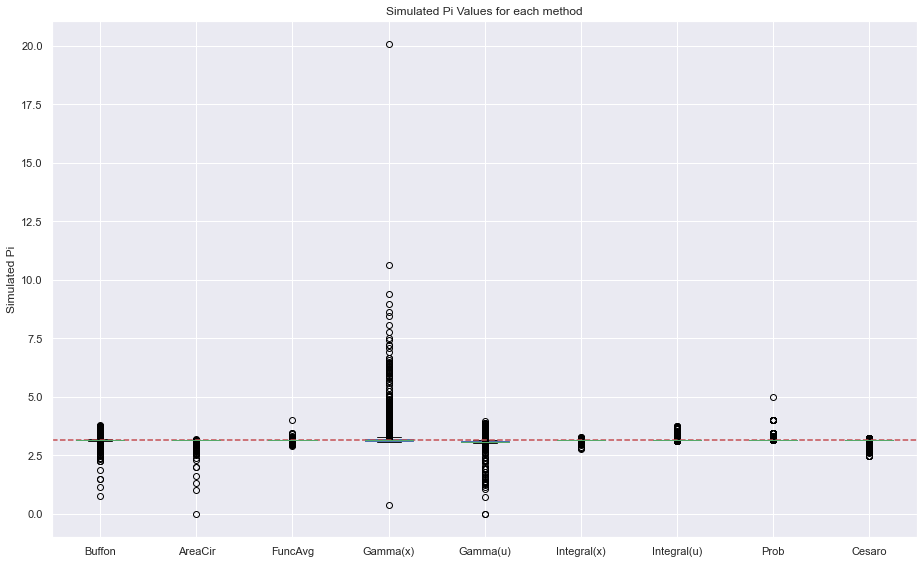

In [79]:
# Set the figure size
plt.rcParams["figure.figsize"] = [13,8]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Buffon": pi_B[0:100000], "AreaCir": pi_A, "FuncAvg": pi_f, "Gamma(x)": pi_M1,
                    "Gamma(u)": pi_M2, "Integral(x)": pi_M3, "Integral(u)": pi_M4,
                    "Prob": pi_P, "Cesaro": pi_C})

# Plot the dataframe
ax = data[['Buffon', 'AreaCir', 'FuncAvg', 'Gamma(x)','Gamma(u)', 'Integral(x)', 'Integral(u)',
          'Prob', 'Cesaro']].plot(kind='box', title='Simulated Pi Values for each method')
ax.axhline(y=math.pi, color='r', linestyle='--') 
# to set the label of y axis
ax.set_ylabel("Simulated Pi")

# Display the plot
plt.show()

It is visible that there is not much variability in the values of pi. As a matter of fact the boxplot are so short that they seem like a line (almost all of them have the similar InterQuartile Range). The medians (which is generally close enough to the average) for all the boxplots are at the same level which is coinciding with the red line which is true value of pi. There are some extreme observations (outliers) for each of the method. For Gamma Integral Method, for both with x and after change of variable, there appears to be values simulated that are much greater or lower than pi. For methods like Function Average, Integral with x and u, Probability Calculation and Cesaro, the simulated values are much less variable and are all almost all closer to true pi.

To see which method is computationally faster, we'll see the run time when all the MC methods were run for$N=[10^{2}, 10^{3}, 10^{4}]$ for 3 seeds and also when they were individually evaluated for $10^{5}$. For Non MC Method Archimedes, I have evaluated it once for all the 4 N.

In [80]:
# create a dataframe of runtime for 3 seeds
runT_df = pd.DataFrame({
    'Methods': ['Archimedes', 'Buffon', 'AreaOfCircle', 'FunctionAverage', 'GammaFunctionIntegral(x)', 
                'GammaFunctionIntegral(u)', 'Integral(x)', 'Integral(u)', 'ProbabilityCalculation',
               'Cesaro Theorem'],
    'RunTime': runT
    })

# display the dataframe
runT_df

Methods   RunTime
0                Archimedes  0.000908
1                    Buffon  1.258251
2              AreaOfCircle  0.134627
3           FunctionAverage  7.536039
4  GammaFunctionIntegral(x)  5.601519
5  GammaFunctionIntegral(u)  7.538722
6               Integral(x)  5.644982
7               Integral(u)  7.580223
8    ProbabilityCalculation  5.434485
9            Cesaro Theorem  0.154797

We can see that Archimedes took the least time to run for all N. Among the MC methods, AreaOfCircle and Cesaro Theorem has the least runtime. From the boxplot, we can see that AreaOfCircle produces more outliers than Cesaro's theorem. The Integration methods (Gamma,Integral) with x as variable have smaller runtime but more outliers than same integrals with the change of variables. Buffon's take about 1.2 seconds to run which is very negligible but it has a more outliers than AreaOfCircle and Cesaro while the Probability Calculation  and Fucntion Average which have the least outliers have a runtime of 5.5 and 7.5 seconds, respectively.

In [81]:
# create a dataframe of runtime for 100000
runTime_df = pd.DataFrame({
    'Methods': ['Buffon', 'AreaOfCircle', 'FunctionAverage', 'GammaFunctionIntegral(x)', 
                'GammaFunctionIntegral(u)', 'Integral(x)', 'Integral(u)', 'ProbabilityCalculation',
               'Cesaro Theorem'],
    'RunTime': runTime
    })

# display the dataframe
runTime_df

Methods     RunTime
0                    Buffon    3.381038
1              AreaOfCircle    0.209657
2           FunctionAverage  237.295328
3  GammaFunctionIntegral(x)  172.978553
4  GammaFunctionIntegral(u)  238.479611
5               Integral(x)  175.017329
6               Integral(u)  241.396950
7    ProbabilityCalculation  174.928162
8            Cesaro Theorem    0.298220

This shows similar results as above. AreaOfCircle and Cesaro's Theorem has the least runtime. While both the integration methods with x as variable take about 3 minutes to run while after change of variables, it increases to 4 minutes for both the methods. Buffon's take about 3.3 seconds to run which is not huge while the Probability Calculation and Function Average which have the least outliers take about 3 and 4 minutes, respectively.

***
## Conclusion

This project tried to approximate 𝞹 using various methods involving random sampling, calculus and geometry. I tried to implement 8 methods to get the value of pi as close to the actual pi possible. All the visualization and results above convey that we were able to get our values simulated as close as possible to 𝞹 itself. For the MC methods, as we increase the number of simulations, we get values that were close to true pi and also there was lesser variability in the values as the length of errorbars kept decreasing. Although some methods took longer to evaluate and had some outliers, we were still able to get values close to pi. The Integration Methods take longer to run as N increases while these methods (Gamma,Integral) with x have more outliers than after the change of variable. Although ProbabilityCalculation and  Function Average Methods had the least variability and with least outliers but as N increased, these methods were slow to run. The Non MC Archimedes method was faster to run and give us value close to true pi. Out of the MC methods, I feel AreaOfCircle and Cesaro's Theorem were faster and also had less variability in the values being simulated from them for N = $10^6$. Also, Gamma Function Integral(x) although has many outliers and take longer to evaluate but it converges (mean approximation at true pi) at N=100. Similarly, Buffon's needle and Integrals after change of variables  methods get an approximation at true pi for N=100 for some seeds. Addtionally methods like Integrals after change of variables and Area of a Quarter Circle converge at or closer to true pi (for most seeds) for N = 1000. Rest of the methods get an approximation of actual pi at N = $10^{4}$.